In [4]:
!pip install koreanize_matplotlib -q
!pip install statsmodels -q
!pip install konlpy -q
!pip install mecab-python3 -q


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import koreanize_matplotlib
import warnings
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from konlpy.tag import Okt
import MeCab
from datetime import timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
from collections import Counter

warnings.simplefilter(action='ignore')

%config InlineBackend.figure_format = 'retina'

In [5]:
application = pd.read_csv(r'C:\Users\hbyr0\Desktop\취업 플랫폼\사이드프로젝트\input\Application.csv', index_col=0)
company = pd.read_csv(r'C:\Users\hbyr0\Desktop\취업 플랫폼\사이드프로젝트\input\Company.csv', index_col=0)
company_address = pd.read_csv(r'C:\Users\hbyr0\Desktop\취업 플랫폼\사이드프로젝트\input\CompanyAddress.csv', index_col=0)
company_fund = pd.read_csv(r'C:\Users\hbyr0\Desktop\취업 플랫폼\사이드프로젝트\input\CompanyFund.csv', index_col=0)
job = pd.read_csv(r'C:\Users\hbyr0\Desktop\취업 플랫폼\사이드프로젝트\input\Job.csv', index_col=0)
job_address = pd.read_csv(r'C:\Users\hbyr0\Desktop\취업 플랫폼\사이드프로젝트\input\JobAddress.csv', index_col=0)
job_bookmark = pd.read_csv(r'C:\Users\hbyr0\Desktop\취업 플랫폼\사이드프로젝트\input\JobBookmark.csv', index_col=0)
log = pd.read_csv(r'C:\Users\hbyr0\Desktop\취업 플랫폼\사이드프로젝트\output\sort5_log.csv', index_col=0)

# Guide Action 사용자의 전환율이 더 높을 것이다

In [6]:
log['action_type'].unique()

array(['etc', 'profile', 'apply-step1', 'profile-notify', 'job-recruit',
       'apply-step2', 'apply-step3', 'search', 'apply-step4',
       'profile-verify', 'apply-progress', 'apply-done', 'apply-update',
       'companies-view', 'guideclick', 'signup-click', 'companies-member',
       'signup-done', 'apply-click', 'profile-setting', 'social',
       'guide-specialty', 'guide-language', 'guide-newscard',
       'guide-funding', 'companies-bookmark', 'guide-overview',
       'guide-career', 'job-bookmark', 'guide-snscard'], dtype=object)

In [7]:
log[log['action_type'].str.contains('guide')]

,user_uuid,URL,timestamp,date,response_code,method,prev_time,time_diff,new_session,session_id,cleaned_URL,query_params,action_type
6401379,000681b4-bb66-4ccf-9786-f0066d13a34e,api/current_guided_action/id,2023-12-24 21:20:39.402941+09:00,2023-12-24,200,POST,2023-12-24 21:20:38.969202+09:00,0.433739,False,1,api/current_guided_action/id,NaN,guideclick
6401386,000681b4-bb66-4ccf-9786-f0066d13a34e,api/current_guided_action/id,2023-12-24 21:32:45.711569+09:00,2023-12-24,200,POST,2023-12-24 21:32:45.183480+09:00,0.528089,False,1,api/current_guided_action/id,NaN,guideclick
6401487,000681b4-bb66-4ccf-9786-f0066d13a34e,api/current_guided_action/id,2023-12-26 22:39:09.424780+09:00,2023-12-26,200,POST,2023-12-26 22:39:08.930750+09:00,0.494030,False,2,api/current_guided_action/id,NaN,guideclick
4124048,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/current_guided_action/id,2023-06-23 21:21:47.518684+09:00,2023-06-23,200,POST,2023-06-23 21:21:46.290391+09:00,1.228293,False,4,api/current_guided_action/id,NaN,guideclick
4124187,000b55ad-5c86-438b-a5b0-9ea3a2917789,api/current_guided_action/id,2023-07-06 20:01:43.809967+09:00,2023-07-06,200,POST,2023-07-06 20:01:43.006189+09:00,0.803778,False,12,api/current_guided_action/id,NaN,guideclick
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7304083,ffff25ca-c1d7-4fc2-891b-b0df92f95092,api/current_guided_action/id,2022-02-19 00:14:46.063569+09:00,2022-02-19,200,POST,2022-02-19 00:14:45.834827+09:00,0.228742,False,2,api/current_guided_action/id,NaN,guideclick
7304019,ffff25ca-c1d7-4fc2-891b-b0df92f95092,api/current_guided_action/id,2022-02-19 00:19:01.368274+09:00,2022-02-19,200,POST,2022-02-19 00:19:01.092598+09:00,0.275676,False,2,api/current_guided_action/id,NaN,guideclick
7304026,ffff25ca-c1d7-4fc2-891b-b0df92f95092,api/current_guided_action/id,2022-02-19 00:19:35.440987+09:00,2022-02-19,200,POST,2022-02-19 00:19:35.131202+09:00,0.309785,False,2,api/current_guided_action/id,NaN,guideclick
7304101,ffff25ca-c1d7-4fc2-891b-b0df92f95092,api/current_guided_action/id,2022-02-19 00:19:57.493265+09:00,2022-02-19,200,POST,2022-02-19 00:19:57.178650+09:00,0.314615,False,2,api/current_guided_action/id,NaN,guideclick


In [8]:
# 가이드 액션 사용 로그, 유저
guide_action_log = log[log['action_type'].str.contains('guide-')]
guide_action_user = guide_action_log['user_uuid'].unique()

# 가이드 액션 미사용 로그, 유저
not_guide_action_log = log[~log['user_uuid'].isin(guide_action_user)]
not_guide_action_user = not_guide_action_log['user_uuid'].unique()

## 사용, 미사용자 유입 추이

In [9]:
print(f"가이드 액션 사용 유저 수: {len(guide_action_user)}") 
print(f"가이드 액션 미사용 유저 수: {len(not_guide_action_user)}")

가이드 액션 사용 유저 수: 4479
가이드 액션 미사용 유저 수: 16606


In [10]:
guide_action_log['date'] = pd.to_datetime(guide_action_log['date'])
not_guide_action_log['date'] = pd.to_datetime(not_guide_action_log['date'])

In [11]:
guide_action_log['y_m'] = guide_action_log['date'].dt.strftime('%Y-%m')
not_guide_action_log['y_m'] = not_guide_action_log['date'].dt.strftime('%Y-%m')

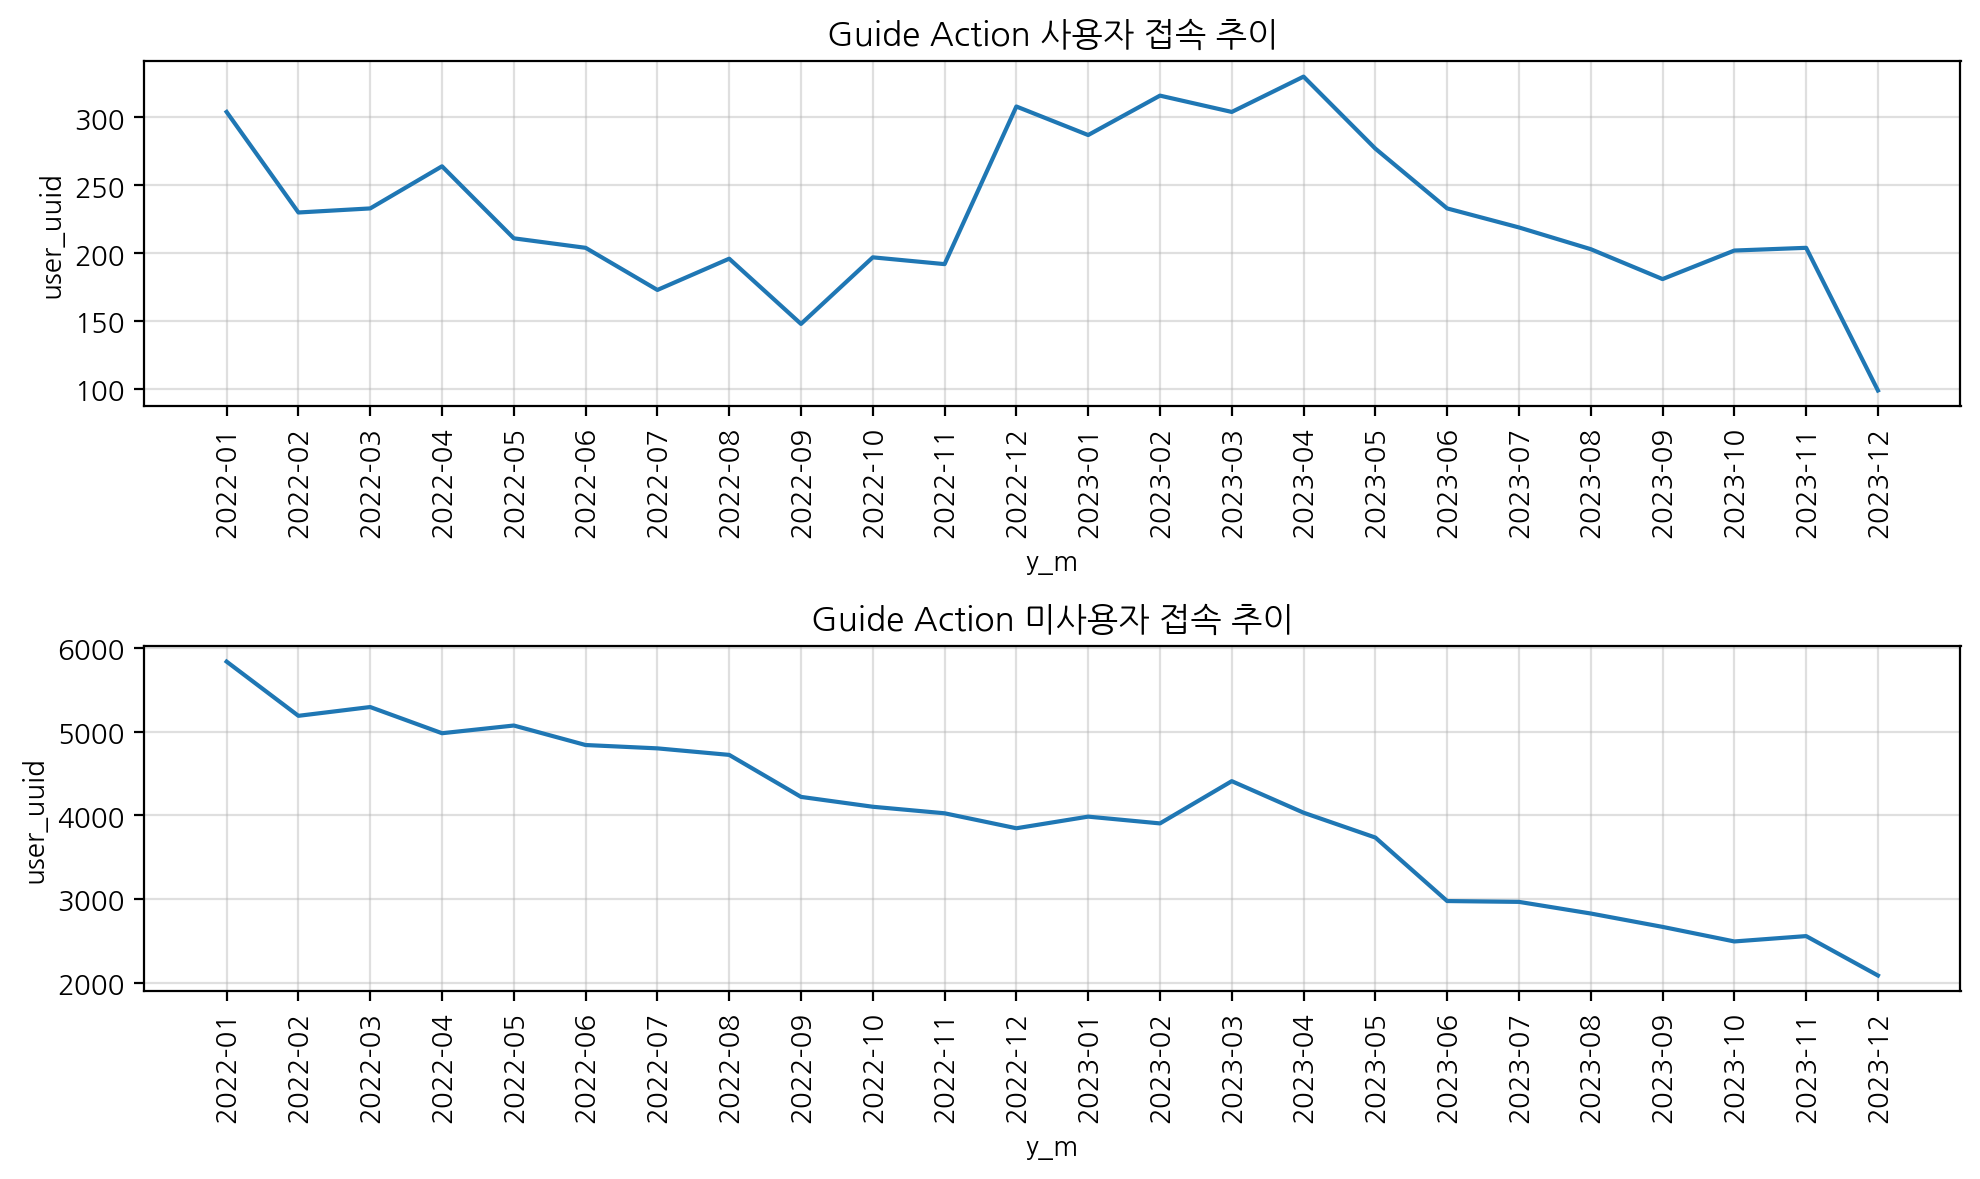

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

sns.lineplot(data=guide_action_log.groupby('y_m')['user_uuid'].nunique().reset_index(), x='y_m', y='user_uuid', ax=ax1)
ax1.set_title('Guide Action 사용자 접속 추이')
ax1.tick_params(axis='x', rotation=90)
ax1.grid(alpha=0.4)

sns.lineplot(data=not_guide_action_log.groupby('y_m')['user_uuid'].nunique().reset_index(), x='y_m', y='user_uuid', ax=ax2)
ax2.set_title('Guide Action 미사용자 접속 추이')
ax2.tick_params(axis='x', rotation=90)
ax2.grid(alpha=0.4)

plt.tight_layout()
plt.show()

In [13]:
log[log['user_uuid'].isin(guide_action_user)]
log[log['user_uuid'].isin(not_guide_action_user)]

,user_uuid,URL,timestamp,date,response_code,method,prev_time,time_diff,new_session,session_id,cleaned_URL,query_params,action_type
449898,0002535c-eacb-456b-a620-92c917332ba3,@user_id?action=request_approval_complete,2022-01-15 16:44:06.150657+09:00,2022-01-15,200,GET,NaN,NaN,True,1,@user_id,action=request_approval_complete,etc
449899,0002535c-eacb-456b-a620-92c917332ba3,api/users/id/template,2022-01-15 16:44:08.578129+09:00,2022-01-15,200,POST,2022-01-15 16:44:06.150657+09:00,2.427472e+00,False,1,api/users/id/template,NaN,profile
449945,0002535c-eacb-456b-a620-92c917332ba3,@user_id?action=request_approval_complete,2022-03-01 14:45:33.359728+09:00,2022-03-01,200,GET,2022-01-15 16:44:08.578129+09:00,3.880885e+06,True,2,@user_id,action=request_approval_complete,etc
449931,0002535c-eacb-456b-a620-92c917332ba3,api/users/id/template,2022-03-01 14:45:35.489070+09:00,2022-03-01,200,POST,2022-03-01 14:45:33.359728+09:00,2.129342e+00,False,2,api/users/id/template,NaN,profile
449907,0002535c-eacb-456b-a620-92c917332ba3,@user_id?action=request_approval_complete,2022-04-19 00:12:10.181361+09:00,2022-04-19,200,GET,2022-03-01 14:45:35.489070+09:00,4.181195e+06,True,3,@user_id,action=request_approval_complete,etc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776702,ffff25ca-c1d7-4fc2-891b-b0df92f95092,api/users/id/template,2023-12-19 00:06:35.877009+09:00,2023-12-19,200,POST,2023-12-19 00:06:35.373638+09:00,5.033710e-01,False,97,api/users/id/template,NaN,profile
1776680,ffff25ca-c1d7-4fc2-891b-b0df92f95092,@user_id,2023-12-19 00:06:36.763225+09:00,2023-12-19,200,GET,2023-12-19 00:06:35.877009+09:00,8.862160e-01,False,97,@user_id,NaN,etc
1776610,ffff25ca-c1d7-4fc2-891b-b0df92f95092,api/users/id/template,2023-12-19 00:06:37.210715+09:00,2023-12-19,200,POST,2023-12-19 00:06:36.763225+09:00,4.474900e-01,False,97,api/users/id/template,NaN,profile
1776598,ffff25ca-c1d7-4fc2-891b-b0df92f95092,jobs,2023-12-19 00:06:46.206558+09:00,2023-12-19,200,GET,2023-12-19 00:06:37.210715+09:00,8.995843e+00,False,97,jobs,NaN,job-recruit


## 가설 검증

In [14]:
guide_action_log = log[log['user_uuid'].isin(guide_action_user)]
not_guide_action_log = log[log['user_uuid'].isin(not_guide_action_user)]

In [15]:
print(f"가이드 액션 사용자 수 : {len(guide_action_user)}")
print(f"가이드 액션 미사용자 수: {len(not_guide_action_user)}")

가이드 액션 사용자 수 : 4479
가이드 액션 미사용자 수: 16606


In [16]:
print(f"가이드 액션을 쓰고, 지원서 제출 한 유저 수: {guide_action_log[guide_action_log['action_type'] == 'apply-done']['user_uuid'].nunique()}")
print(f"가이드 액션을 안 쓰고, 지원서 제출한 유저 수: {not_guide_action_log[not_guide_action_log['action_type'] == 'apply-done']['user_uuid'].nunique()}")

가이드 액션을 쓰고, 지원서 제출 한 유저 수: 3756
가이드 액션을 안 쓰고, 지원서 제출한 유저 수: 6272


In [17]:
print(f"가이드액션 사용자 전환율: {round(guide_action_log[guide_action_log['action_type'] == 'apply-done']['user_uuid'].nunique() / len(guide_action_user) * 100,2)} %")
print(f"가이드액션 미사용자 전환율: {round(not_guide_action_log[not_guide_action_log['action_type'] == 'apply-done']['user_uuid'].nunique() / len(not_guide_action_user) * 100,2)} %")

가이드액션 사용자 전환율: 83.86 %
가이드액션 미사용자 전환율: 37.77 %


```
가이드 액션 사용 여부에 따라 전환율이 차이가 있을 것이다 = 양측 검정 (two-sided)
가이드 액션 사용한 유저의 전환율이 더 높을 것이다 = 단측 검정 (larger)
가이드 액션 사용한 유저의 전환유리 더 낮을 것이다 = 단측 검정 (smaller)
````

In [18]:
successes = [3756, 6272]
nobs = [4479, 16606]

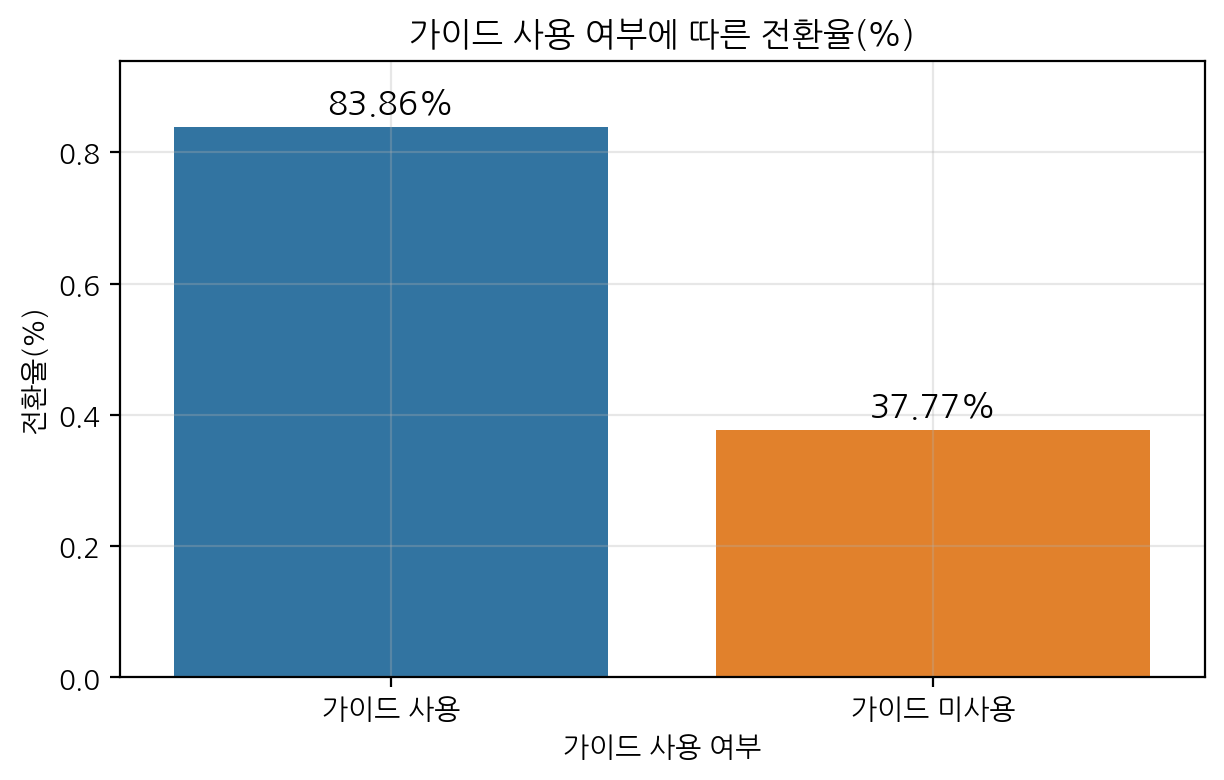

In [19]:
coversion_rates = np.array(successes) / np.array(nobs)
labels = ['가이드 사용', '가이드 미사용']
colors = ['#63b1ff', '#ff8fd4']


plt.figure(figsize=(7,4))
ax = sns.barplot(x=labels, y=coversion_rates, hue=labels)

plt.title('가이드 사용 여부에 따른 전환율(%)')
plt.ylabel('전환율(%)')
plt.xlabel('가이드 사용 여부')
plt.grid(alpha=0.3)

for i, rate in enumerate(coversion_rates):
    plt.text(i,
              rate + 0.01,
              f'{rate*100:.2f}%',
              ha='center',
              va='bottom',
              fontsize=12
              )

plt.ylim(0, max(coversion_rates) + 0.1)

plt.show()

```
p-value 가 0.5 미만.
가설 : 가이드 액션을 사용한 유저의 전환율이 더 높을 것이다 
    → '유의미하다'

가이드 사용 전환율 = 55.46 %
가이드 미사용 전환율 = 16.21%

〓 약 39% 차이로 가이드 액션 사용 여부에 따라 전환율 차이가 유의미함
즉, 가이드 기능은 지원 전환에 기여를 하고 있다는 것을 파악함
```

In [20]:
# 세부 기능의 기여도 분석
log['time_diff'] = log['time_diff'].round(3)

In [21]:
# time_diff 소수점 3자리까지
log['time_diff'] = log['time_diff'].round(3)

# timestamp 시간변환
log['timestamp'] = pd.to_datetime(log['timestamp'], format='mixed')

# timestamp UTC문자 제거
log['timestamp'] = log['timestamp'].dt.tz_localize(None)


# EDA

## 세션별 체류시간, event 횟수

In [22]:
etc_log = log[log['action_type'] != 'etc']

In [23]:
# 유저별 세션별 session_start, session_end, 체류시간, event 횟수, 지원서 제출 여부
session_summary = (
    log.groupby(['user_uuid', 'session_id'])
    .agg(
        session_start=('timestamp', 'min'),
        session_end=('timestamp', 'max'),
        session_duration=('time_diff', 'sum'),
        event_count=('action_type', 'count'),
        converted=('action_type', lambda x: 'apply-done' in x.values)
    )
    .reset_index()
)

In [24]:
# 유저별 가이드 사용 여부
user_guide_flag = (
    log.groupby('user_uuid')['action_type']
    .apply(lambda x: x.str.contains('guide-').any())
    .rename('used_guide')
    .reset_index()
)

# 유저별 지원서(이력서) 사용 여부
user_resume_flag = (
    log.groupby('user_uuid')['action_type']
    .apply(lambda x: x.str.contains('apply-done').any())
    .rename('used_resume')
    .reset_index()
)

In [25]:
# 유저별 세션 수
session_count = (
    etc_log.groupby('user_uuid')['session_id']
    .nunique()
    .rename('session_count')
    .reset_index()
)
session_count

,user_uuid,session_count
0,0002535c-eacb-456b-a620-92c917332ba3,25
1,0005769f-54b1-44ab-b6d3-bd9147c006a8,2
2,000681b4-bb66-4ccf-9786-f0066d13a34e,2
3,000b55ad-5c86-438b-a5b0-9ea3a2917789,49
4,000d53f7-5ddd-48ba-8dab-bb77b157e13a,4
...,...,...
21029,fff082bd-c063-4d10-be2d-b2b53f54527e,1
21030,fff3440e-7c0a-485b-a392-c41023060e96,15
21031,fff45252-3c40-4805-99e9-6b650c1fca80,20
21032,fff8a5c0-c85b-4e30-a22d-ed61b4480615,8


In [26]:
user_guide_summary = pd.merge(user_guide_flag, session_count, on='user_uuid') 
user_resume_summary = pd.merge(user_resume_flag, session_count, on='user_uuid')

In [27]:
user_guide_summary['revisited'] = user_guide_summary['session_count'] >= 2

# 재방문율 계산
revisit_guide_rate = (
    user_guide_summary
    .groupby('used_guide')['revisited']
    .mean()
    .reset_index()
    .rename(columns={'revisited': 'revisit_rate'})
)

revisit_guide_rate

,used_guide,revisit_rate
0,False,0.861854
1,True,0.995758


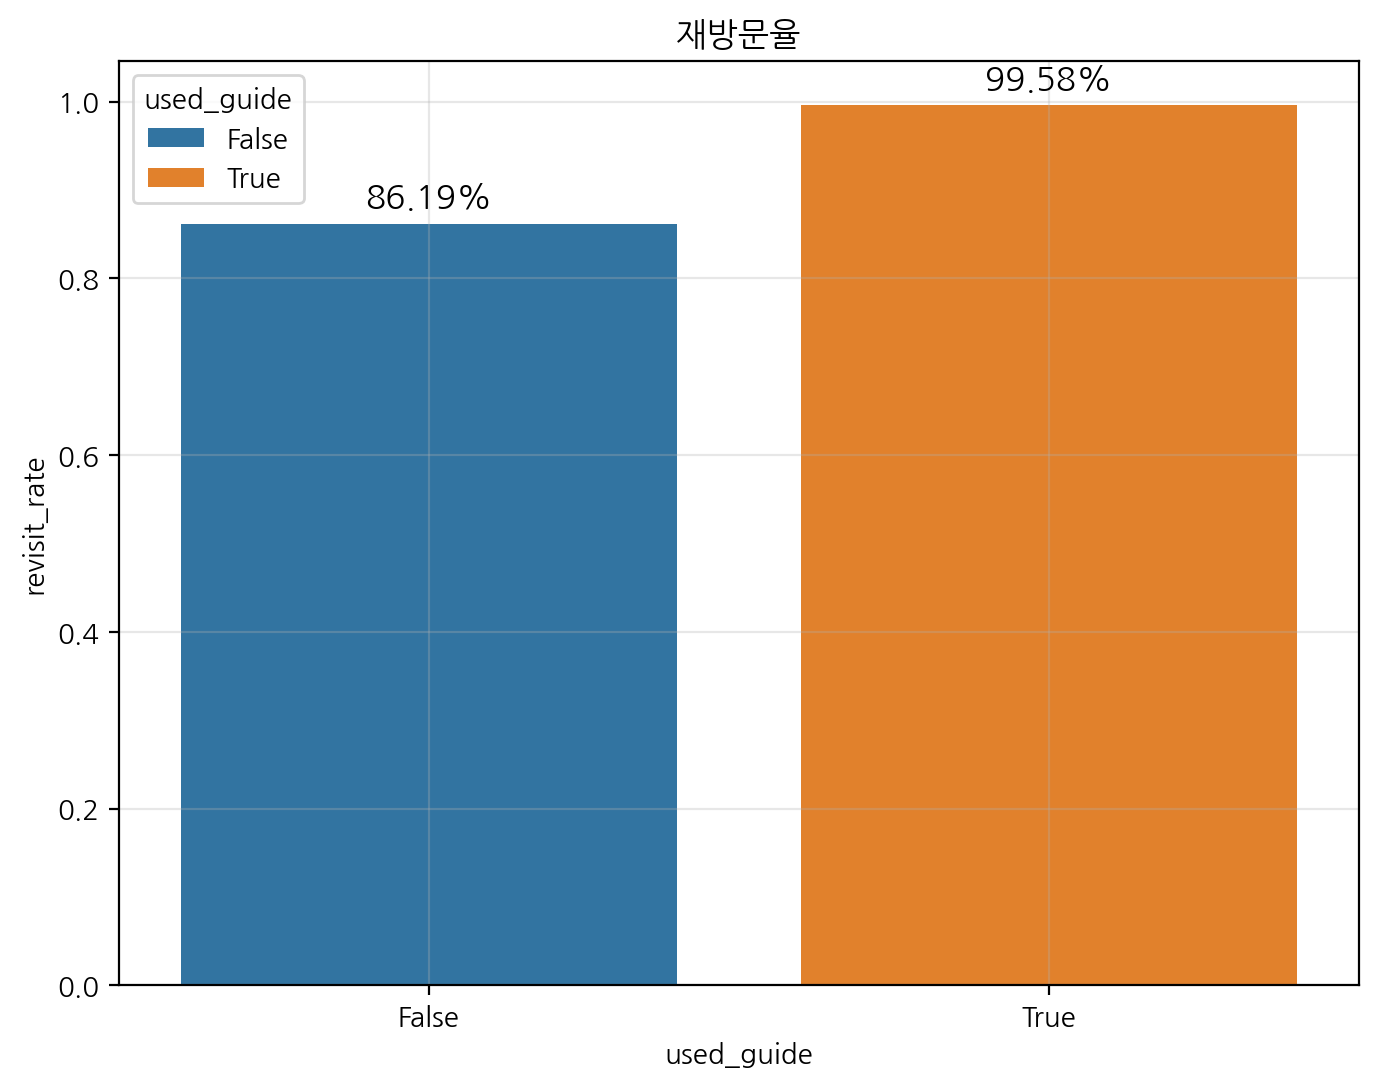

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(data=revisit_guide_rate, x='used_guide', y='revisit_rate', hue='used_guide')
for i, row in revisit_guide_rate.iterrows():
    rate = row['revisit_rate']
    plt.text(i, 
             rate + 0.01, 
             f'{rate*100:.2f}%', 
             ha='center', 
             va='bottom', 
             fontsize=12)
plt.title('재방문율')
plt.grid(alpha=0.3)
plt.show()

## Funnel

### 전체 Funnel

In [29]:
# 함수 정의
def remove_after_apply(df):
    if 'apply-step4' in df['action_type'].values:
        apply_idx = df[df['action_type'] == 'apply-step4'].index[0]
        position = df.index.get_loc(apply_idx)
        return df.iloc[:position+1]
    else:
        return df

# 유저별 적용
log_trimmed = log.groupby('user_uuid', group_keys=False).apply(remove_after_apply)


In [30]:
log_trimmed['action_prefix'] = log_trimmed['action_type']

In [31]:
# 탐색 - 가이드 - 지원 - 지원 완료로 나타내기 위해
# 간소화
log_trimmed['action_prefix'].replace({
    'profile' : 'exploration',
    'profile-notify' : 'exploration',
    'profile-setting' : 'exploration',
    'profile-verify' : 'etc',
    'job-recruit' : 'exploration',
    'social' : 'exploration',
    'search' : 'exploration',
    'companies-view' : 'exploration',
    'companies-member' : 'exploration',
    'profile' : 'exploration',
    'profile' : 'exploration',
    'profile' : 'exploration',
    'guideclick' : 'guide-click',
    'guide-specialty' : 'guide-step',
    'guide-language' : 'guide-step',
    'guide-newscard' : 'guide-step',
    'guide-funding' : 'guide-step',
    'companies-bookmark' : 'guide-step',
    'guide-overview' : 'guide-step',
    'guide-career' : 'guide-step',
    'guide-snscard' : 'guide-step',
    'apply-click' : 'apply-click',
    'apply-step1' : 'apply-step',
    'apply-step2' : 'apply-step',
    'apply-step3' : 'apply-step',
    'apply-update' : 'etc',
    'apply-progress' : 'etc',
    'apply-step4' : 'apply-done',
    'apply-done' : 'apply-done',
}, inplace=True)

In [32]:
# action_prefix 확인
log_trimmed['action_prefix'].unique()

array(['etc', 'exploration', 'apply-step', 'apply-done', 'guide-click',
       'signup-click', 'signup-done', 'guide-step', 'job-bookmark',
       'apply-click'], dtype=object)

In [33]:
# 이벤트별 최초 이용 시각을 정리한 유저별 테이블을 만듦
event_pivot = log_trimmed.pivot_table(
    index='user_uuid',
    columns='action_prefix',
    values='timestamp',
    aggfunc='min'        
)

# 위 테이블을 기반으로 퍼널 분석
steps = ['exploration','guide-click', 'guide-step', 'apply-step', 'apply-done']
funnel_counts = {step: event_pivot[step].notna().sum() for step in steps if step in event_pivot.columns}

funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]

funnel_df

,step,user_count,conversion_rate
0,exploration,20912,1.000000
1,guide-click,15115,0.722791
2,guide-step,4714,0.225421
3,apply-step,11402,0.545237
4,apply-done,10131,0.484459


In [34]:
# 퍼널 분석

# 1단계: 탐색을 한 유저
step1 = event_pivot[event_pivot['exploration'].notna()]

# 2단계: 탐색도 하고 가이드도 한 유저
step2 = step1[step1['guide-click'].notna()]

# 3단계: 위 + 지원서 작성까지 한 유저
step3 = step2[step2['guide-step'].notna()]

# 4단계: 위 + 지원 완료까지 한 유저
step4 = step3[step3['apply-step'].notna()]

# 5단계
step5 = step4[step4['apply-done'].notna()]

# user 수와 전환율 정리
funnel_counts = {
    '탐색': len(step1),
    '가이드 클릭': len(step2),
    '가이드 이용': len(step3),
    '지원 클릭': len(step4),
    '지원 완료': len(step5)
}

funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]
funnel_df


,step,user_count,conversion_rate
0,탐색,20912,1.000000
1,가이드 클릭,15110,0.722552
2,가이드 이용,4579,0.218965
3,지원 클릭,3606,0.172437
4,지원 완료,3320,0.158761


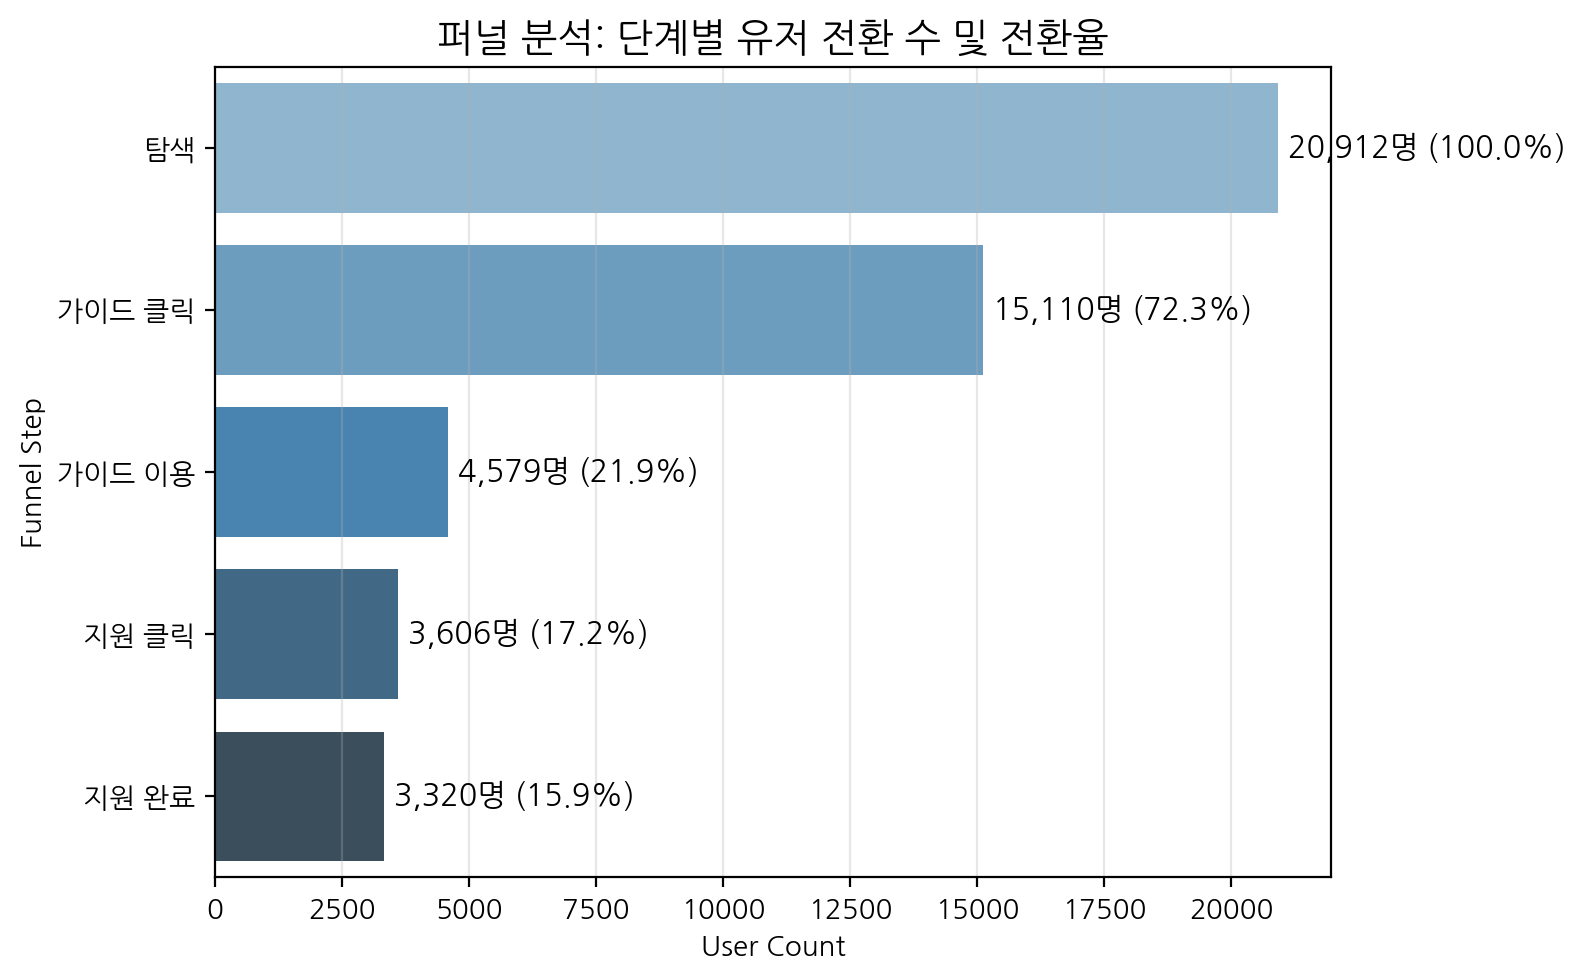

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 순서를 위에서 아래로 자연스럽게 보이게 하기 위해 순서 반전
funnel_df_sorted = funnel_df[::1]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=funnel_df_sorted,
    x='user_count',
    y='step',
    palette='Blues_d'  # 차분한 블루 계열 색상
)

# 레이블 텍스트 추가
for i, row in funnel_df_sorted.iterrows():
    plt.text(
        row['user_count'] + 200,   # 바 끝부분 기준으로 오른쪽
        i,
        f"{row['user_count']:,}명 ({row['conversion_rate']*100:.1f}%)",
        va='center',
        fontsize=11
    )

plt.title('퍼널 분석: 단계별 유저 전환 수 및 전환율', fontsize=14)
plt.xlabel('User Count')
plt.ylabel('Funnel Step')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
# 퍼널 분석

# 1단계: 탐색을 한 유저
step1 = event_pivot[event_pivot['exploration'].notna()]

# 2단계: 탐색도 하고 가이드도 한 유저
step2 = step1[step1['apply-step'].notna()]

# 3단계: 위 + 지원서 작성까지 한 유저
step3 = step2[step2['apply-done'].notna()]

# user 수와 전환율 정리
funnel_counts = {
    '탐색': len(step1),
    '지원 클릭': len(step2),
    '지원 완료': len(step3)
}

funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]
funnel_df


,step,user_count,conversion_rate
0,탐색,20912,1.000000
1,지원 클릭,11396,0.544950
2,지원 완료,10122,0.484028


### 가이드 미사용 유저 Funnel

In [37]:
# 가이드 이용 유저 / 아닌 유저
guide_user = log_trimmed[log_trimmed['action_prefix'].str.contains('guide-step')]['user_uuid']
not_guide_user = log_trimmed[~log_trimmed['user_uuid'].isin(guide_user)]['user_uuid']

In [38]:
log_trimmed_not_guide = log_trimmed[log_trimmed['user_uuid'].isin(not_guide_user)]

In [39]:
# 이벤트별 최초 이용 시각을 정리한 유저별 테이블을 만듦
event_pivot = log_trimmed_not_guide.pivot_table(
    index='user_uuid',
    columns='action_prefix',
    values='timestamp',
    aggfunc='min'        
)

# 위 테이블을 기반으로 퍼널 분석
steps = ['exploration','guide-click', 'guide-step', 'apply-step', 'apply-done']
funnel_counts = {step: event_pivot[step].notna().sum() for step in steps if step in event_pivot.columns}

funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]

funnel_df

,step,user_count,conversion_rate
0,exploration,16198,1.000000
1,guide-click,10536,0.650451
2,apply-step,7725,0.476911
3,apply-done,6752,0.416842


In [40]:
# 퍼널 분석 2

# 1단계: 탐색을 한 유저
step1 = event_pivot[event_pivot['exploration'].notna()]

# 2단계: 탐색도 하고 가이드도 한 유저
step2 = step1[step1['apply-step'].notna()]

# 4단계: 위 + 지원 완료까지 한 유저
step3 = step2[step2['apply-done'].notna()]


# user 수와 전환율 정리
funnel_counts = {
    '탐색': len(step1),
    '지원 클릭': len(step2),
    '지원 완료': len(step3),
}

funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]
funnel_df

,step,user_count,conversion_rate
0,탐색,16198,1.000000
1,지원 클릭,7719,0.476540
2,지원 완료,6746,0.416471


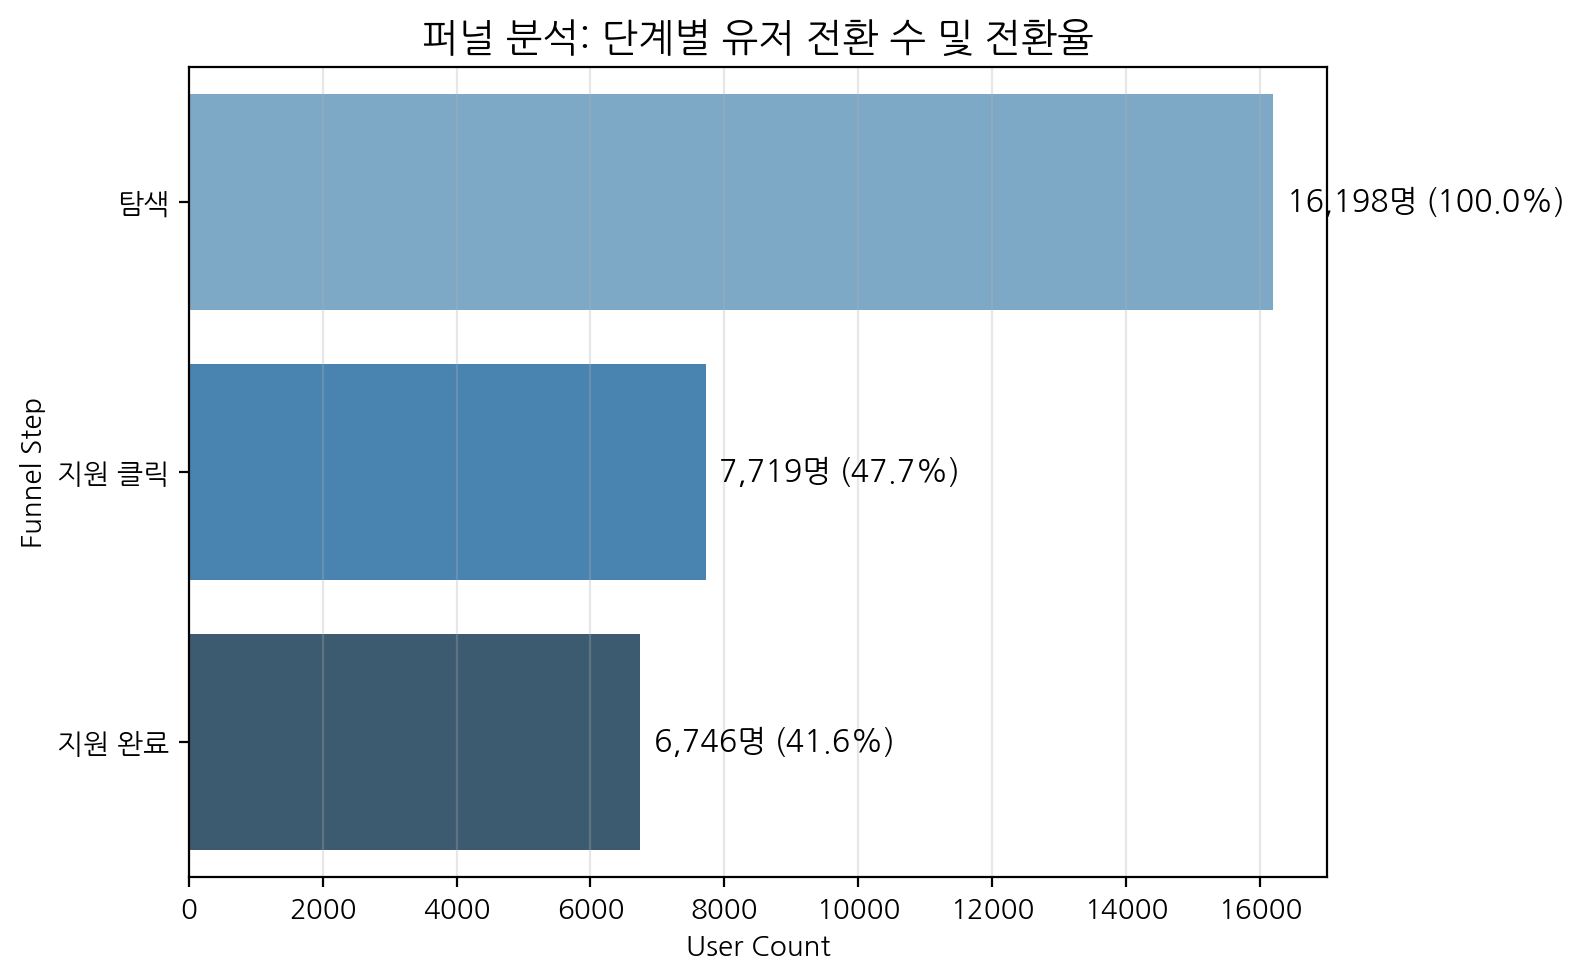

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 순서를 위에서 아래로 자연스럽게 보이게 하기 위해 순서 반전
funnel_df_sorted = funnel_df[::1]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=funnel_df_sorted,
    x='user_count',
    y='step',
    palette='Blues_d'  # 차분한 블루 계열 색상
)

# 레이블 텍스트 추가
for i, row in funnel_df_sorted.iterrows():
    plt.text(
        row['user_count'] + 200,   # 바 끝부분 기준으로 오른쪽
        i,
        f"{row['user_count']:,}명 ({row['conversion_rate']*100:.1f}%)",
        va='center',
        fontsize=11
    )

plt.title('퍼널 분석: 단계별 유저 전환 수 및 전환율', fontsize=14)
plt.xlabel('User Count')
plt.ylabel('Funnel Step')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#### 가이드액션 클릭 > 지원클릭

In [42]:
# action 확인하구 step 설정
event_pivot

action_prefix,apply-click,apply-done,apply-step,etc,exploration,guide-click,job-bookmark,signup-click,signup-done
user_uuid,,,,,,,,,
0002535c-eacb-456b-a620-92c917332ba3,NaT,2022-07-23 13:07:41.792524,2022-06-08 15:25:30.977917,2022-01-15 16:44:06.150657,2022-01-15 16:44:08.578129,NaT,NaT,NaT,NaT
0005769f-54b1-44ab-b6d3-bd9147c006a8,NaT,NaT,NaT,2022-11-07 13:42:24.760892,2022-11-07 13:42:32.683363,NaT,NaT,NaT,NaT
000681b4-bb66-4ccf-9786-f0066d13a34e,NaT,NaT,NaT,2023-12-24 20:54:38.290138,2023-12-24 20:55:41.566966,2023-12-24 21:20:39.402941,NaT,2023-12-26 22:35:34.655784,NaT
000b55ad-5c86-438b-a5b0-9ea3a2917789,NaT,2023-07-06 20:08:36.265207,2023-07-06 20:08:19.447925,2023-06-21 20:04:00.551562,2023-06-21 20:02:01.742970,2023-06-23 21:21:47.518684,NaT,2023-06-21 20:01:34.663903,2023-06-21 20:03:51.737453
000d53f7-5ddd-48ba-8dab-bb77b157e13a,NaT,NaT,2022-02-17 11:12:54.380815,2022-02-17 11:10:51.623535,2022-02-17 11:10:52.887974,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...
fff082bd-c063-4d10-be2d-b2b53f54527e,NaT,NaT,NaT,2022-12-22 17:07:13.257169,2022-12-22 17:07:12.244799,2022-12-22 17:11:15.276118,NaT,NaT,NaT
fff3440e-7c0a-485b-a392-c41023060e96,NaT,2023-01-02 14:04:16.216925,2023-01-02 12:16:14.123353,2023-01-02 12:16:13.747792,2023-01-02 12:16:14.890943,NaT,NaT,NaT,NaT
fff45252-3c40-4805-99e9-6b650c1fca80,NaT,2023-01-20 18:18:33.233534,2023-01-20 18:07:52.488348,2022-12-27 10:01:34.102277,2022-12-27 10:03:35.732445,NaT,NaT,2022-12-27 10:01:21.130353,2022-12-27 10:08:24.808972


In [43]:
# 퍼널 분석 2

# 1단계: 탐색을 한 유저
step1 = event_pivot[event_pivot['exploration'].notna()]

# 4단계: 위 + 지원 완료까지 한 유저
step2 = step1[step1['guide-click'].notna()]

# 2단계: 탐색도 하고 가이드도 한 유저
step3 = step2[step2['apply-step'].notna()]

# 4단계: 위 + 지원 완료까지 한 유저
step4 = step3[step3['apply-done'].notna()]


# user 수와 전환율 정리
funnel_counts = {
    '탐색': len(step1),
    '가이드 클릭': len(step2),
    '지원 클릭' : len(step3),
    '지원 완료': len(step4)
}

funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]
funnel_df

,step,user_count,conversion_rate
0,탐색,16198,1.000000
1,가이드 클릭,10531,0.650142
2,지원 클릭,5090,0.314236
3,지원 완료,4378,0.270280


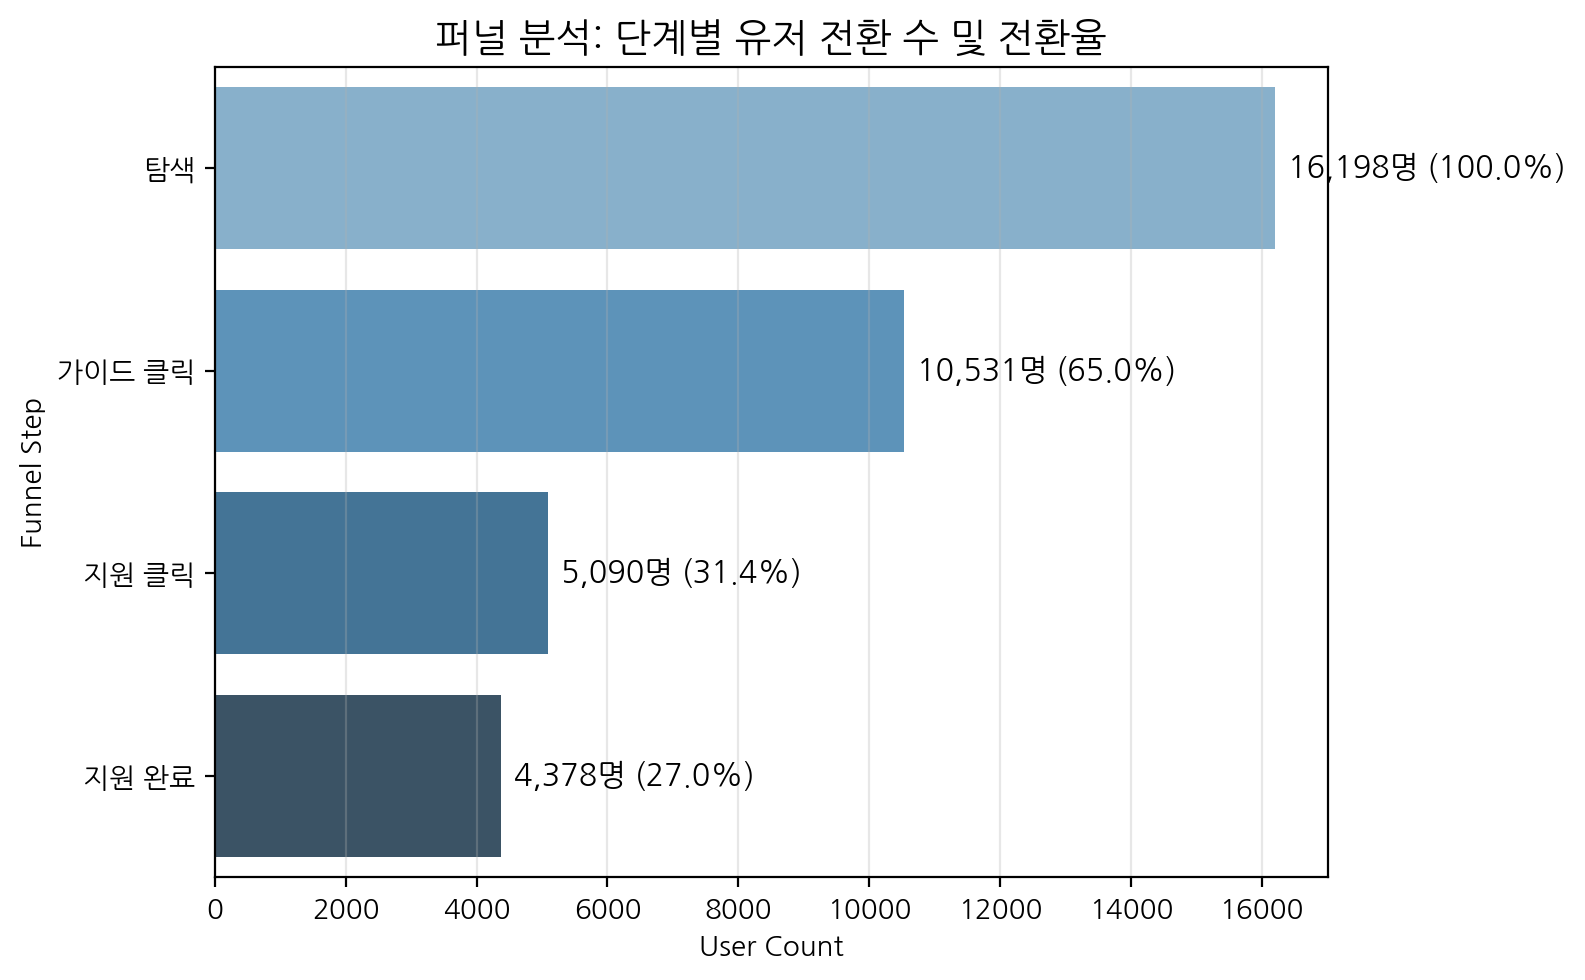

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 순서를 위에서 아래로 자연스럽게 보이게 하기 위해 순서 반전
funnel_df_sorted = funnel_df[::1]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=funnel_df_sorted,
    x='user_count',
    y='step',
    palette='Blues_d'  # 차분한 블루 계열 색상
)

# 레이블 텍스트 추가
for i, row in funnel_df_sorted.iterrows():
    plt.text(
        row['user_count'] + 200,   # 바 끝부분 기준으로 오른쪽
        i,
        f"{row['user_count']:,}명 ({row['conversion_rate']*100:.1f}%)",
        va='center',
        fontsize=11
    )

plt.title('퍼널 분석: 단계별 유저 전환 수 및 전환율', fontsize=14)
plt.xlabel('User Count')
plt.ylabel('Funnel Step')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 가이드 사용 유저 Funnel

In [ ]:
log_trimmed_guide = log_trimmed[log_trimmed['user_uuid'].isin(guide_user)]

In [ ]:
# 이벤트별 최초 이용 시각을 정리한 유저별 테이블을 만듦
event_pivot = log_trimmed_guide.pivot_table(
    index='user_uuid',
    columns='action_prefix',
    values='timestamp',
    aggfunc='min'        
)

# 위 테이블을 기반으로 퍼널 분석
steps = ['exploration','guide-click', 'guide-step', 'apply-step', 'apply-done']
funnel_counts = {step: event_pivot[step].notna().sum() for step in steps if step in event_pivot.columns}

funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]

funnel_df

,step,user_count,conversion_rate
0,exploration,4714,1.000000
1,guide-click,4579,0.971362
2,guide-step,4714,1.000000
3,apply-step,3677,0.780017
4,apply-done,3379,0.716801


In [ ]:
# 퍼널 분석

# 1단계: 탐색을 한 유저
step1 = event_pivot[event_pivot['exploration'].notna()]

# 2단계: 탐색 + 가이드 진입
step2 = step1[step1['guide-click'].notna()]

# 3단계: 탐색 + 가이드 진입 + 가이드 기능 사용
step3 = step2[step2['guide-step'].notna()]

# 4단계: 탐색 + 가이드 진입 + 가이드 기능 사용 + 지원 진입
step4 = step3[step3['apply-step'].notna()]

# 5단계: 탐색 + 가이드 진입 + 가이드 기능 사용 + 지원 진입 + 지원 완료
step5 = step4[step4['apply-done'].notna()]

# user 수와 전환율 정리
funnel_counts = {
    '탐색': len(step1),
    '가이드 클릭': len(step2),
    '가이드 이용': len(step3),
    '지원 클릭': len(step4),
    '지원 완료': len(step5)
}

funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]
funnel_df


,step,user_count,conversion_rate
0,탐색,4714,1.000000
1,가이드 클릭,4579,0.971362
2,가이드 이용,4579,0.971362
3,지원 클릭,3606,0.764955
4,지원 완료,3320,0.704285


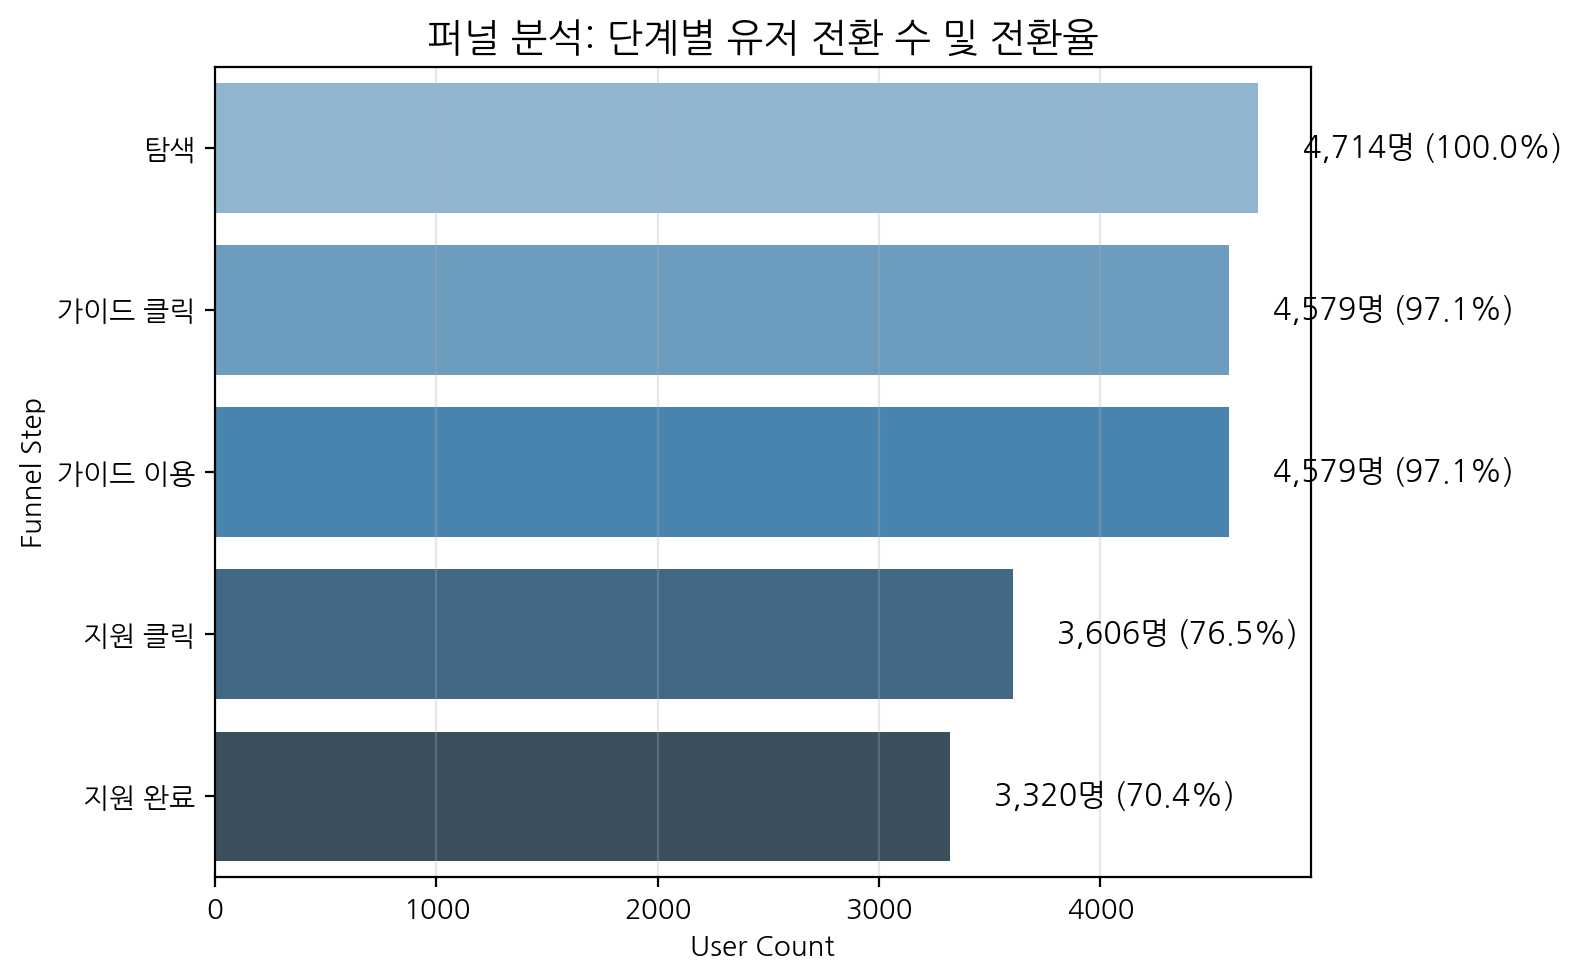

In [ ]:
# 순서 반전
funnel_df_sorted = funnel_df[::1]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=funnel_df_sorted,
    x='user_count',
    y='step',
    palette='Blues_d'
)

# 레이블 텍스트 추가
for i, row in funnel_df_sorted.iterrows():
    plt.text(
        row['user_count'] + 200
        i,
        f"{row['user_count']:,}명 ({row['conversion_rate']*100:.1f}%)",
        va='center',
        fontsize=11
    )

plt.title('퍼널 분석: 단계별 유저 전환 수 및 전환율', fontsize=14)
plt.xlabel('User Count')
plt.ylabel('Funnel Step')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
log['month'] = log['timestamp'].dt.strftime('%Y-%m') 

# 가이드액션 현황

## 미노출 / 노출 / 노출+사용

In [ ]:
log_trimmed['action_prefix'].unique()

array(['etc', 'exploration', 'apply-step', 'apply-done', 'guide-click',
       'signup-click', 'signup-done', 'guide-step', 'job-bookmark',
       'apply-click'], dtype=object)

In [ ]:
log_trimmed[log_trimmed['action_prefix'] == 'guide-click']['user_uuid']

6401379    000681b4-bb66-4ccf-9786-f0066d13a34e
6401386    000681b4-bb66-4ccf-9786-f0066d13a34e
6401487    000681b4-bb66-4ccf-9786-f0066d13a34e
4124048    000b55ad-5c86-438b-a5b0-9ea3a2917789
4124187    000b55ad-5c86-438b-a5b0-9ea3a2917789
                           ...                 
7304083    ffff25ca-c1d7-4fc2-891b-b0df92f95092
7304019    ffff25ca-c1d7-4fc2-891b-b0df92f95092
7304026    ffff25ca-c1d7-4fc2-891b-b0df92f95092
7304101    ffff25ca-c1d7-4fc2-891b-b0df92f95092
1777792    ffff25ca-c1d7-4fc2-891b-b0df92f95092
Name: user_uuid, Length: 203650, dtype: object

In [ ]:
# '가이드 클릭' 여부 (1: 클릭, 0: 비클릭)
log_trimmed['is_click'] = log_trimmed['action_prefix'].apply(lambda x: 1 if 'guide-click' in str(x) else 0)

# '가이드 사용' 여부 (1: 가이드 관련, 0: 그 외)
log_trimmed['is_guide'] = log_trimmed['action_prefix'].apply(lambda x: 1 if 'guide-step' in str(x) else 0)

# 유저별로 클릭 여부, 가이드 여부 최대값 추출 (1이 하나라도 있으면 1, 중복 되지 않도록)
user_log_status = log_trimmed.groupby('user_uuid')[['is_click', 'is_guide']].max().reset_index()
user_log_status

,user_uuid,is_click,is_guide
0,0002535c-eacb-456b-a620-92c917332ba3,0,0
1,0005769f-54b1-44ab-b6d3-bd9147c006a8,0,0
2,000681b4-bb66-4ccf-9786-f0066d13a34e,1,0
3,000b55ad-5c86-438b-a5b0-9ea3a2917789,1,0
4,000d53f7-5ddd-48ba-8dab-bb77b157e13a,0,0
...,...,...,...
21080,fff082bd-c063-4d10-be2d-b2b53f54527e,1,0
21081,fff3440e-7c0a-485b-a392-c41023060e96,0,0
21082,fff45252-3c40-4805-99e9-6b650c1fca80,0,0
21083,fff8a5c0-c85b-4e30-a22d-ed61b4480615,0,0


In [ ]:
def classify_user(row):
    if row['is_click'] == 1 and row['is_guide'] == 1:
        return 2
    elif row['is_click'] == 1 and row['is_guide'] == 0:
        return 1
    else:
        return 0

user_log_status['group'] = user_log_status.apply(classify_user, axis=1)

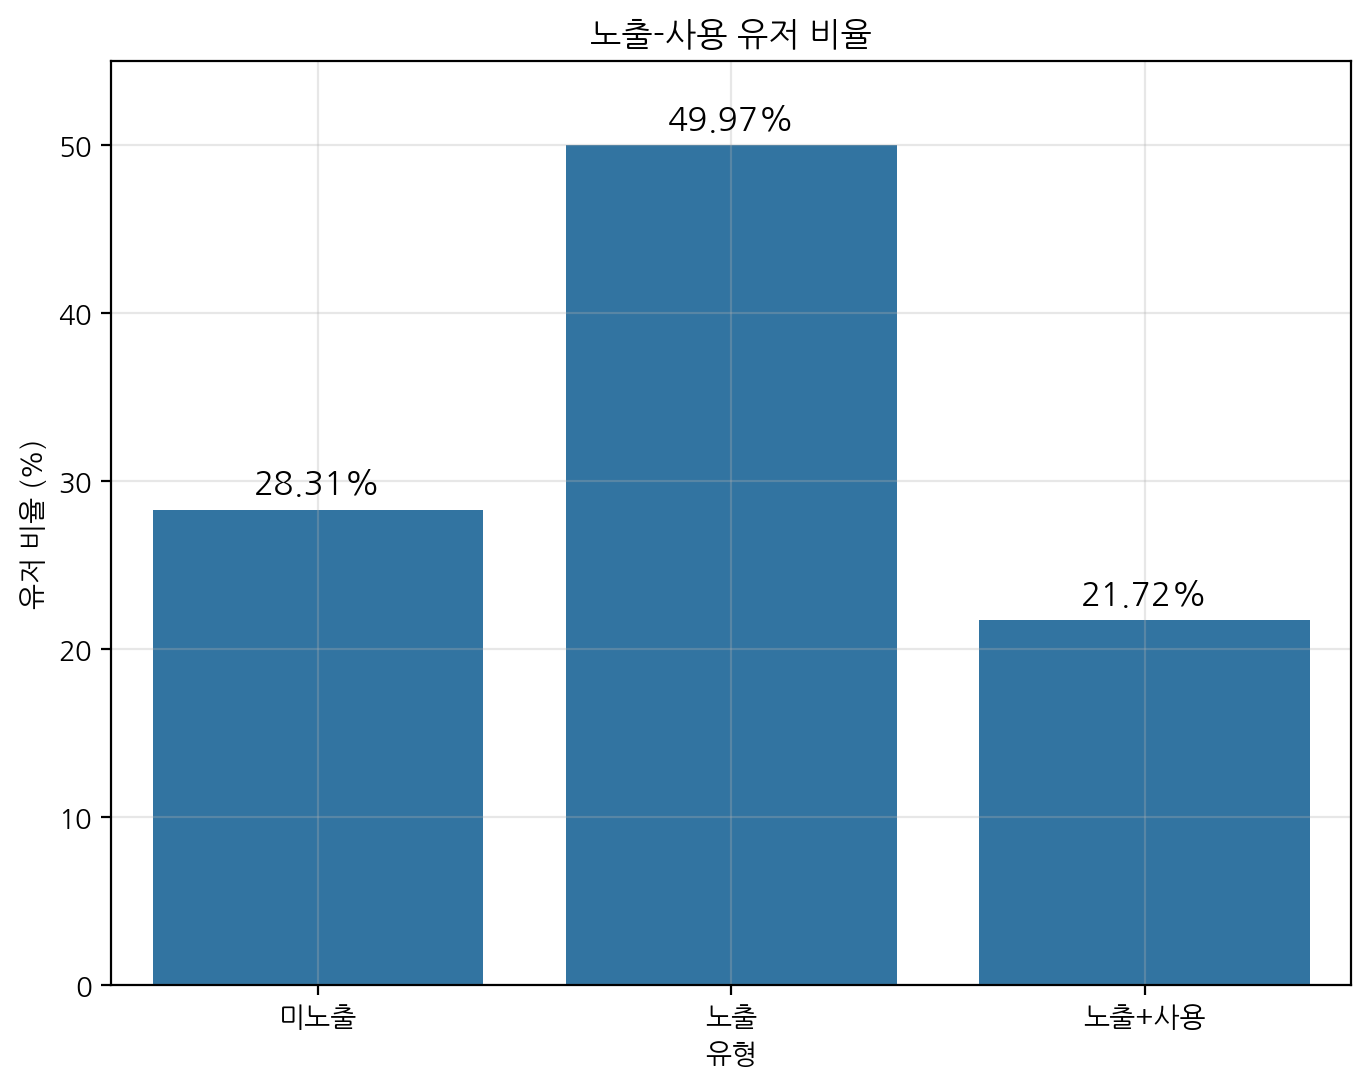

In [ ]:
# 1. 그룹별 유저 수 카운트
click_guide = user_log_status.groupby('group')['user_uuid'].count().reset_index()
click_guide.rename(columns={'user_uuid': 'count'}, inplace=True)

# 2. 비율 컬럼 추가
click_guide['pct'] = round(click_guide['count'] / click_guide['count'].sum() * 100, 2)

# 3. 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=click_guide, x='group', y='pct')

# 4. 바 위에 비율 텍스트 표시
for i, pct in enumerate(click_guide['pct']):
    plt.text(i,
             pct + 0.5,
             f'{pct:.2f}%',
             ha='center',
             va='bottom',
             fontsize=12)

# 5. 기타 설정
plt.title('노출-사용 유저 비율')
plt.grid(alpha=0.3)
plt.xticks(ticks=[0, 1, 2], labels=['미노출', '노출', '노출+사용'])
plt.ylabel('유저 비율 (%)')
plt.xlabel('유형')
plt.ylim(0, click_guide['pct'].max() + 5)
plt.show()


In [ ]:
click_guide

,group,count,pct
0,0,5970,28.31
1,1,10536,49.97
2,2,4579,21.72


```
미노출 유저 : 5,970명 (전체 중 28.31 %)
노출 유저 : 10,536 (전체 중 49.97 %)
노출 및 사용 유저 : 4,579 (전체 중 21.72%)

총 노출 유저 : 15,115 명 (전체 중 71.69 %)
노출 유저 대비 가이드 사용 유저 : 4,578 명 (전환율 30.29 %)

▶ 가이드 액션의 위치, 가이드 액션의 진입 UI/UX는 준수한 편 (총 노출 71.69 %)
▶ 하지만, 기능 사용(이용) 단계에서 이탈율이 높음 (이탈율 69.71 %)

```

# 유저행동분석

```
가이드 액션 기능의 사용을 유도하기 위해 행동패턴 패턴 파악

노출에 비해 현저히 떨어지는 사용자 수
UX 흐름이나 기능 구조에 뭔가 사용이 가로막힌듯한 양상

Q. 왜 노출된 유저가 사용을 안 했을까?
    가설 1. 진입 위치 적절성
    가설 2. 기능 수 과다
    가설 3. 정보 입력 부담
    가설 4. UI / 기능 사용 설득 부족

```

## 미노출/ 노출 / 노출 사용


In [ ]:
# 가이드 기능 세부사항 action_prefix에 적용
log_trimmed.loc[log_trimmed['action_type'].str.startswith('guide-'), 'action_prefix'] = log_trimmed.loc[log_trimmed['action_type'].str.startswith('guide-'), 'action_type']

# 가이드 세부사항까지 나오는 걸 확인
log_trimmed['action_prefix'].unique()

array(['etc', 'exploration', 'apply-step', 'apply-done', 'guide-click',
       'signup-click', 'signup-done', 'guide-specialty', 'guide-language',
       'guide-newscard', 'guide-funding', 'guide-step', 'guide-overview',
       'guide-career', 'job-bookmark', 'guide-snscard', 'apply-click'],
      dtype=object)

In [ ]:
# 유저별 사용 순서 리스트로 묶기
user_paths = log_trimmed.groupby('user_uuid')['action_prefix'].apply(list).reset_index()


# 가이드 노출(클릭)된 순간부터 보기
def get_actions_after_click_deduped(actions):
    if 'guide-click' in actions:
        click_index = actions.index('guide-click')
        after_click = actions[click_index:]
        return list(dict.fromkeys(after_click))
    else:
        return []

# 적용
user_paths['after_click'] = user_paths['action_prefix'].apply(get_actions_after_click_deduped)

# 필요한 컬럼만 가져오기
user_paths = user_paths[['user_uuid', 'after_click']]


# 유저 타입별로 나누기
# 빈 리스트 : 미노출 유저
# 클릭, 가이드 있는 유저 : 노출 + 사용 유저
# 클릭만 있는 유저 : 노출 유저

def classify_user(after_click):
    if not after_click:  # 빈 리스트
        return '미노출 유저'
    elif any(action.startswith('guide-') and action != 'guide-click' for action in after_click):
        return '노출 및 사용 유저'
    else:
        return '노출 유저'


user_paths['user_type'] = user_paths['after_click'].apply(classify_user)


In [ ]:
# 노출 유저 paths (노출, 기능사용X)
exposed_paths = user_paths[user_paths['user_type'] == '노출 유저'][['user_uuid', 'after_click']]

# 노출 및 사용 유저 paths (노출, 기능사용O)
exposed_used_paths = user_paths[user_paths['user_type'] == '노출 및 사용 유저'][['user_uuid', 'after_click']]

### 유저그룹별 행동량

In [ ]:
# 노출 유저의 행동 특성 분석
exposed_paths['action_length'] = exposed_paths['after_click'].apply(len)
exposed_paths['action_length'].describe()

count    10698.000000
mean         4.112544
std          1.232620
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: action_length, dtype: float64

In [ ]:
# 노출 후 기능 사용한 유저의 행동 특성 분석
exposed_used_paths['action_length'] = exposed_used_paths['after_click'].apply(len)
exposed_used_paths['action_length'].describe()

count    4417.000000
mean        8.223681
std         2.660049
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        16.000000
Name: action_length, dtype: float64

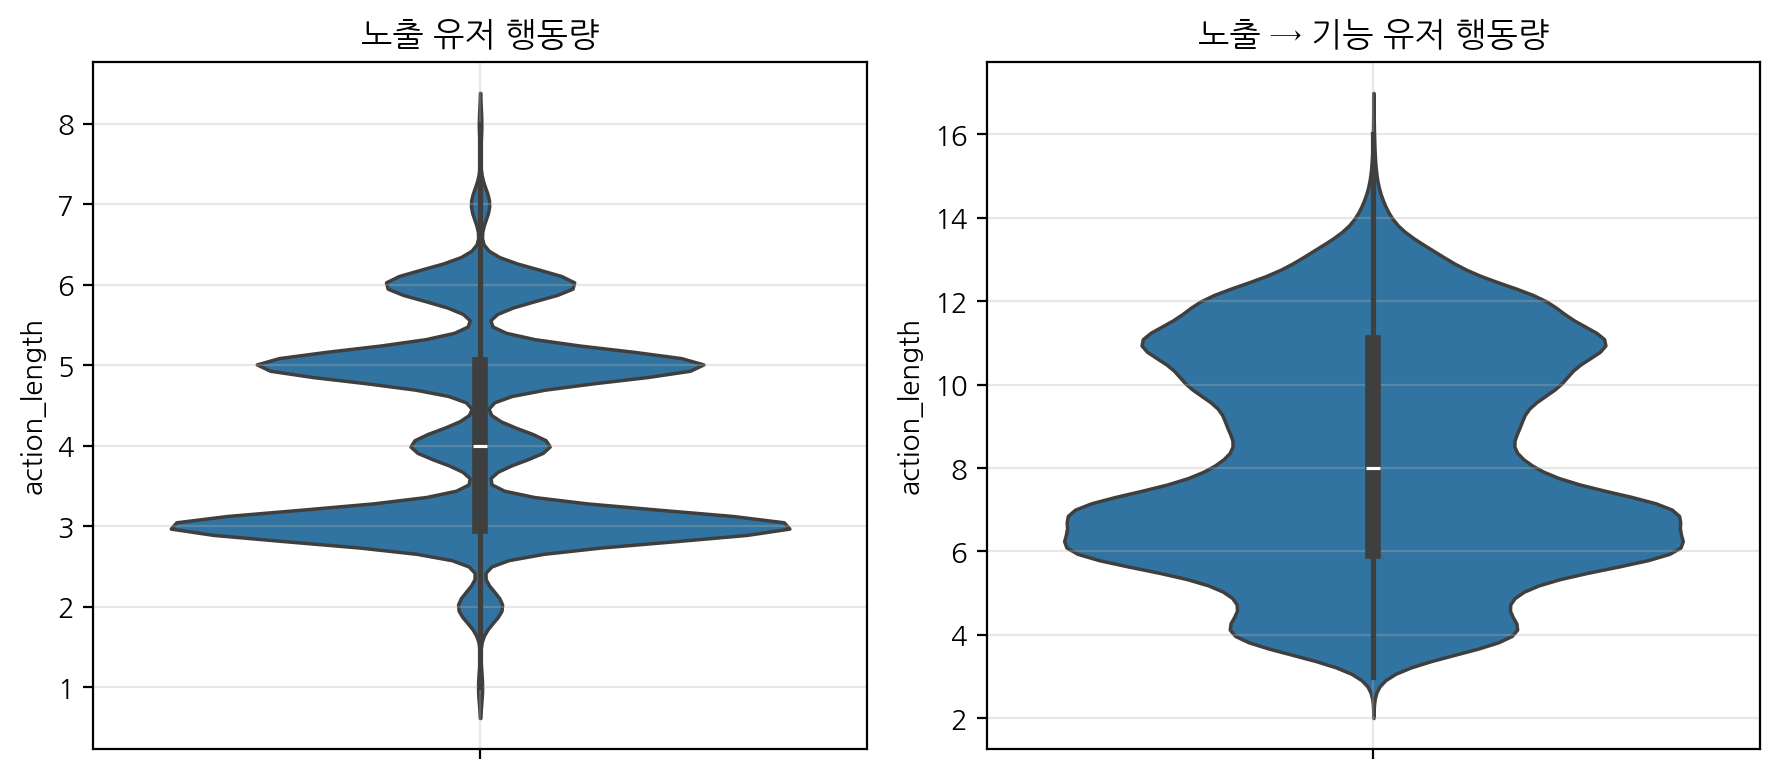

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.violinplot(data=exposed_paths, y='action_length', ax=ax[0])
ax[0].set_title('노출 유저 행동량')
ax[0].grid(alpha=0.3)

sns.violinplot(data=exposed_used_paths, y='action_length', ax=ax[1])
ax[1].set_title('노출 → 기능 유저 행동량')
ax[1].grid(alpha=0.3)


plt.tight_layout()
plt.show()

#### 두 그룹의 평균 행동량은 다르다

In [ ]:
from scipy.stats import ttest_ind

# 예시: 두 그룹의 행동량 데이터
group_A = exposed_paths['action_length']     # 기능 미사용자
group_B = exposed_used_paths['action_length'] # 기능 사용자

# 정규성 만족하지 않아도 괜찮은 Welch’s t-test (등분산 가정 X)
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)

print("T-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ 두 그룹의 행동량 평균은 유의미하게 다릅니다.")
else:
    print("❌ 두 그룹의 행동량 평균 차이는 통계적으로 유의하지 않습니다.")


T-statistic: -98.44435758223715
p-value: 0.0
✅ 두 그룹의 행동량 평균은 유의미하게 다릅니다.


#### 두 그룹의 클릭 이전 경로 차이점

In [ ]:
exposed_paths_user = exposed_paths['user_uuid'].unique()
exposed_used_paths_user = exposed_used_paths['user_uuid'].unique()

# 노출만 된 유저의 클릭 이전 경로 / 노출 및 사용된 유저의 클릭 이전 경로 차이점
# 노출만된 유저의 클릭 이후 경로/ 노출 및 사용된 유저의 클릭 이후 경로

In [ ]:
# 유저별 노출 이전 로그만 추출
guide_click_idx = (
    log[log['action_type'] == 'guideclick']
    .groupby('user_uuid')
    .head(1)  # 첫 번째 클릭만 기준
    .reset_index()
    .rename(columns={'index': 'click_idx'})
)

# 4. 인덱스를 기준으로 유저별 이전 데이터만 필터링
log['row_idx'] = log.index  # 고유 인덱스

# guide_action 클릭 전 path만 남기기 위한 병합
log_with_click_info = pd.merge(log, guide_click_idx[['user_uuid', 'click_idx']], on='user_uuid', how='left')

# 5. 클릭 인덱스 이전 row만 남기기 (클릭 없는 유저는 모두 포함)
log_before_guide_click = log_with_click_info[
    (log_with_click_info['row_idx'] < log_with_click_info['click_idx']) |
    (log_with_click_info['click_idx'].isna())  # guide_action 클릭이 없는 유저
]

log_before_guide_click.drop(columns='click_idx', inplace=True)

In [ ]:
# 노출만된 유저의 로그 추출
exposed_user_before_guide_paths = log_before_guide_click[log_before_guide_click['user_uuid'].isin(exposed_paths_user)]

# 노출 및 사용 유저의 로그 추출
exposed_used_user_before_guide_paths = log_before_guide_click[log_before_guide_click['user_uuid'].isin(exposed_used_paths_user)]

In [ ]:
exposed_before_paths_list = exposed_user_before_guide_paths.groupby('user_uuid')['action_type'].apply(list).reset_index(name='paths')

exposed_used_before_paths_list= exposed_used_user_before_guide_paths.groupby('user_uuid')['action_type'].apply(list).reset_index(name='paths')

### 기능 사용 순서

In [ ]:
# 노출, 사용 유저의 로그
exposed_used_log_trimmed = log_trimmed[log_trimmed['user_uuid'].isin(exposed_used_paths_user)]

# 가이드 이용 로그 추출
used_guide_log_trimmed = exposed_used_log_trimmed[exposed_used_log_trimmed['action_type'].str.contains('guide-')]
used_guide_log_trimmed = used_guide_log_trimmed[['user_uuid', 'action_prefix']]

# 사용 순서 매기기
used_guide_log_trimmed['step'] = used_guide_log_trimmed.groupby('user_uuid').cumcount() + 1

### 기능 개수에 따른 전환율

In [ ]:
# 노출 및 기능 사용 유저의 사용 기능 및 순서
used_guide_log_trimmed

,user_uuid,action_prefix,step
5413559,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-specialty,1
5413620,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-language,2
5413366,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-newscard,3
5413574,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-funding,4
5413449,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-specialty,5
...,...,...,...
450408,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-funding,5
450433,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-career,6
450079,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-snscard,7
9596630,ffcbc399-9452-4feb-bf6c-51330b699252,guide-career,1


In [ ]:
apply_done_user = log_trimmed[log_trimmed['action_type'] == 'apply-done']['user_uuid'].unique()

In [ ]:
user_guide_log_trimmed_done = used_guide_log_trimmed[used_guide_log_trimmed['user_uuid'].isin(apply_done_user)]

In [ ]:
done_step = user_guide_log_trimmed_done.groupby('user_uuid')['step'].last().reset_index()

In [ ]:
done_step

,user_uuid,step
0,3b2a21fe-b872-4e26-beee-66a16e60d87c,2
1,3f4c1fa6-987b-4a50-9c20-e8b38f8db469,14
2,695dcb0d-8d91-4123-a4c6-3cfaf86d5a70,26
3,7687ce86-9ccf-46b9-8cac-5d4dbfb631f8,7
4,7a49c569-84d9-4353-9b47-916c54d78018,2
5,830d79d8-d900-4d67-b0bf-34e2ee41f13d,4
6,9a2d8aef-a28b-43ad-92d2-fb7ba14712b9,8
7,a665f69a-35dc-423a-aaf5-afecd4eee75f,18
8,aba113bf-0f90-4a32-9bad-4c96a5ed58ed,2
9,b1b2736e-0e80-4e75-88ef-54de10cc6dbd,6


In [ ]:
# 이제 기능 순서에 따른 전환율을 봐보자..
# 지원완료 step별 count
filtered_exploded_apply_count = done_step.groupby('step')['user_uuid'].count().reset_index(name='apply_count')

# step별 유저 수
filtered_exploded_user_count = used_guide_log_trimmed.groupby('step')['user_uuid'].count().reset_index(name='user_count')

# filtered_exploded_user_count의 step1은 진입이므로 삭제 (filtered_exploded_apply엔 step1이 없다.)
filtered_exploded_user_count = filtered_exploded_user_count[filtered_exploded_user_count['step'] >= 2]

# 병합
exploded_step_count = pd.merge(filtered_exploded_user_count, filtered_exploded_apply_count, how='inner', on='step')

In [ ]:
# 특정 스텝에서 전환한 유저가 전체 전환자 중 차지하는 비율
exploded_step_count['pct'] = round(exploded_step_count['apply_count'] / exploded_step_count['apply_count'].sum() * 100, 2)

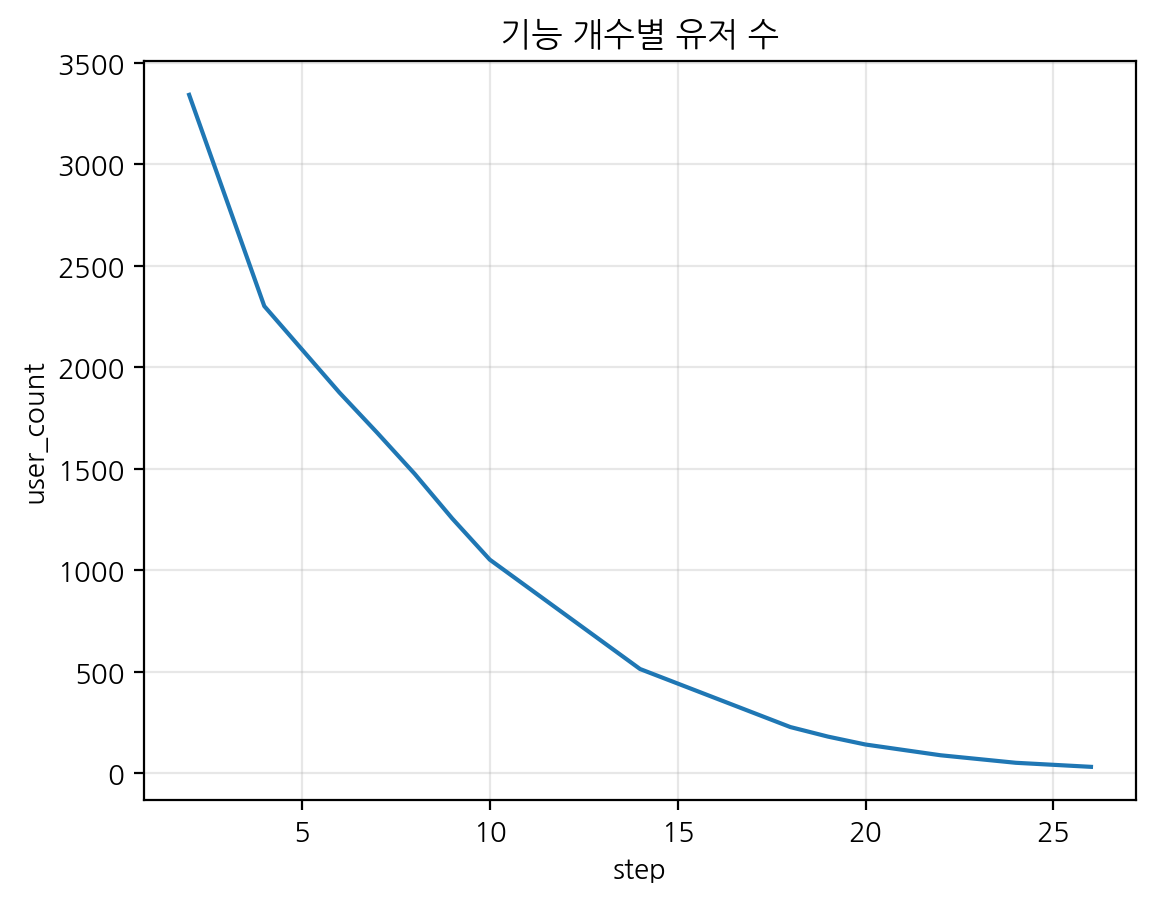

In [ ]:
sns.lineplot(data=exploded_step_count, x='step', y='user_count')
plt.title('기능 개수별 유저 수')
plt.grid(alpha=0.3)
plt.show()

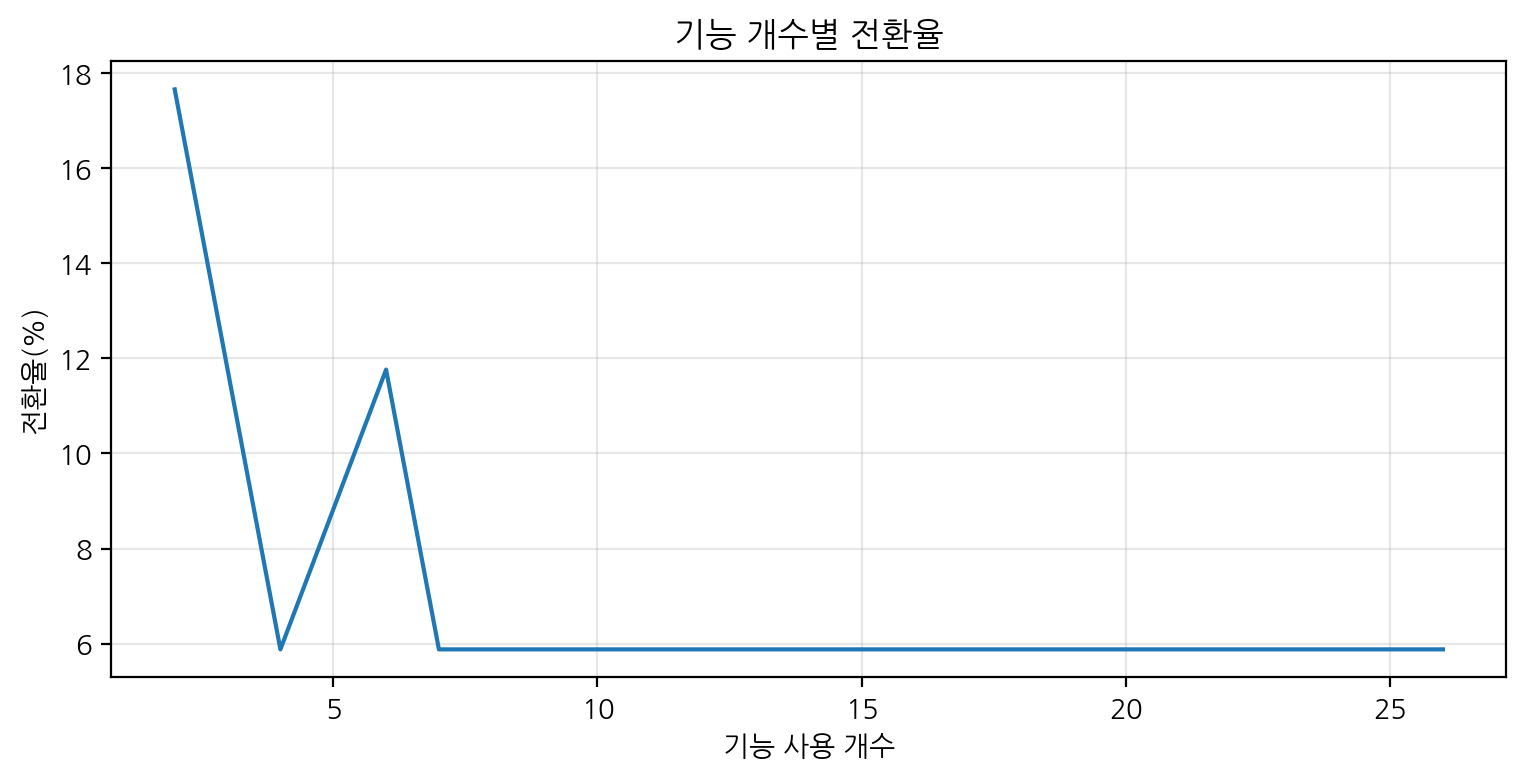

In [ ]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=exploded_step_count, x='step', y='pct')
plt.title('기능 개수별 전환율')
plt.grid(alpha=0.3)
plt.ylabel('전환율(%)')
plt.xlabel('기능 사용 개수')
plt.show()

### 순서별 기능 사용 빈도 (우선배치, 후순위 배치)

In [ ]:
# 중복 없이 처음 등장한 기능들만 순서대로 남기기
# 사전 정렬 (시간 순서)

# 유저별 중복 제거된 시퀀스 만들기
def remove_duplicates(seq):
    seen = set()
    result = []
    for x in seq:
        if x not in seen:
            seen.add(x)
            result.append(x)
    return result

# 유저별 경로 생성
user_unique_path = (
    used_guide_log_trimmed.groupby('user_uuid')['action_prefix']
    .apply(lambda x: remove_duplicates(x.tolist()))
    .reset_index(name='unique_action_path')
)


In [ ]:
# explode
df_exploded = user_unique_path.explode('unique_action_path').reset_index(drop=True)

In [ ]:
df_exploded['step'] = df_exploded.groupby('user_uuid')['unique_action_path'].cumcount() + 1

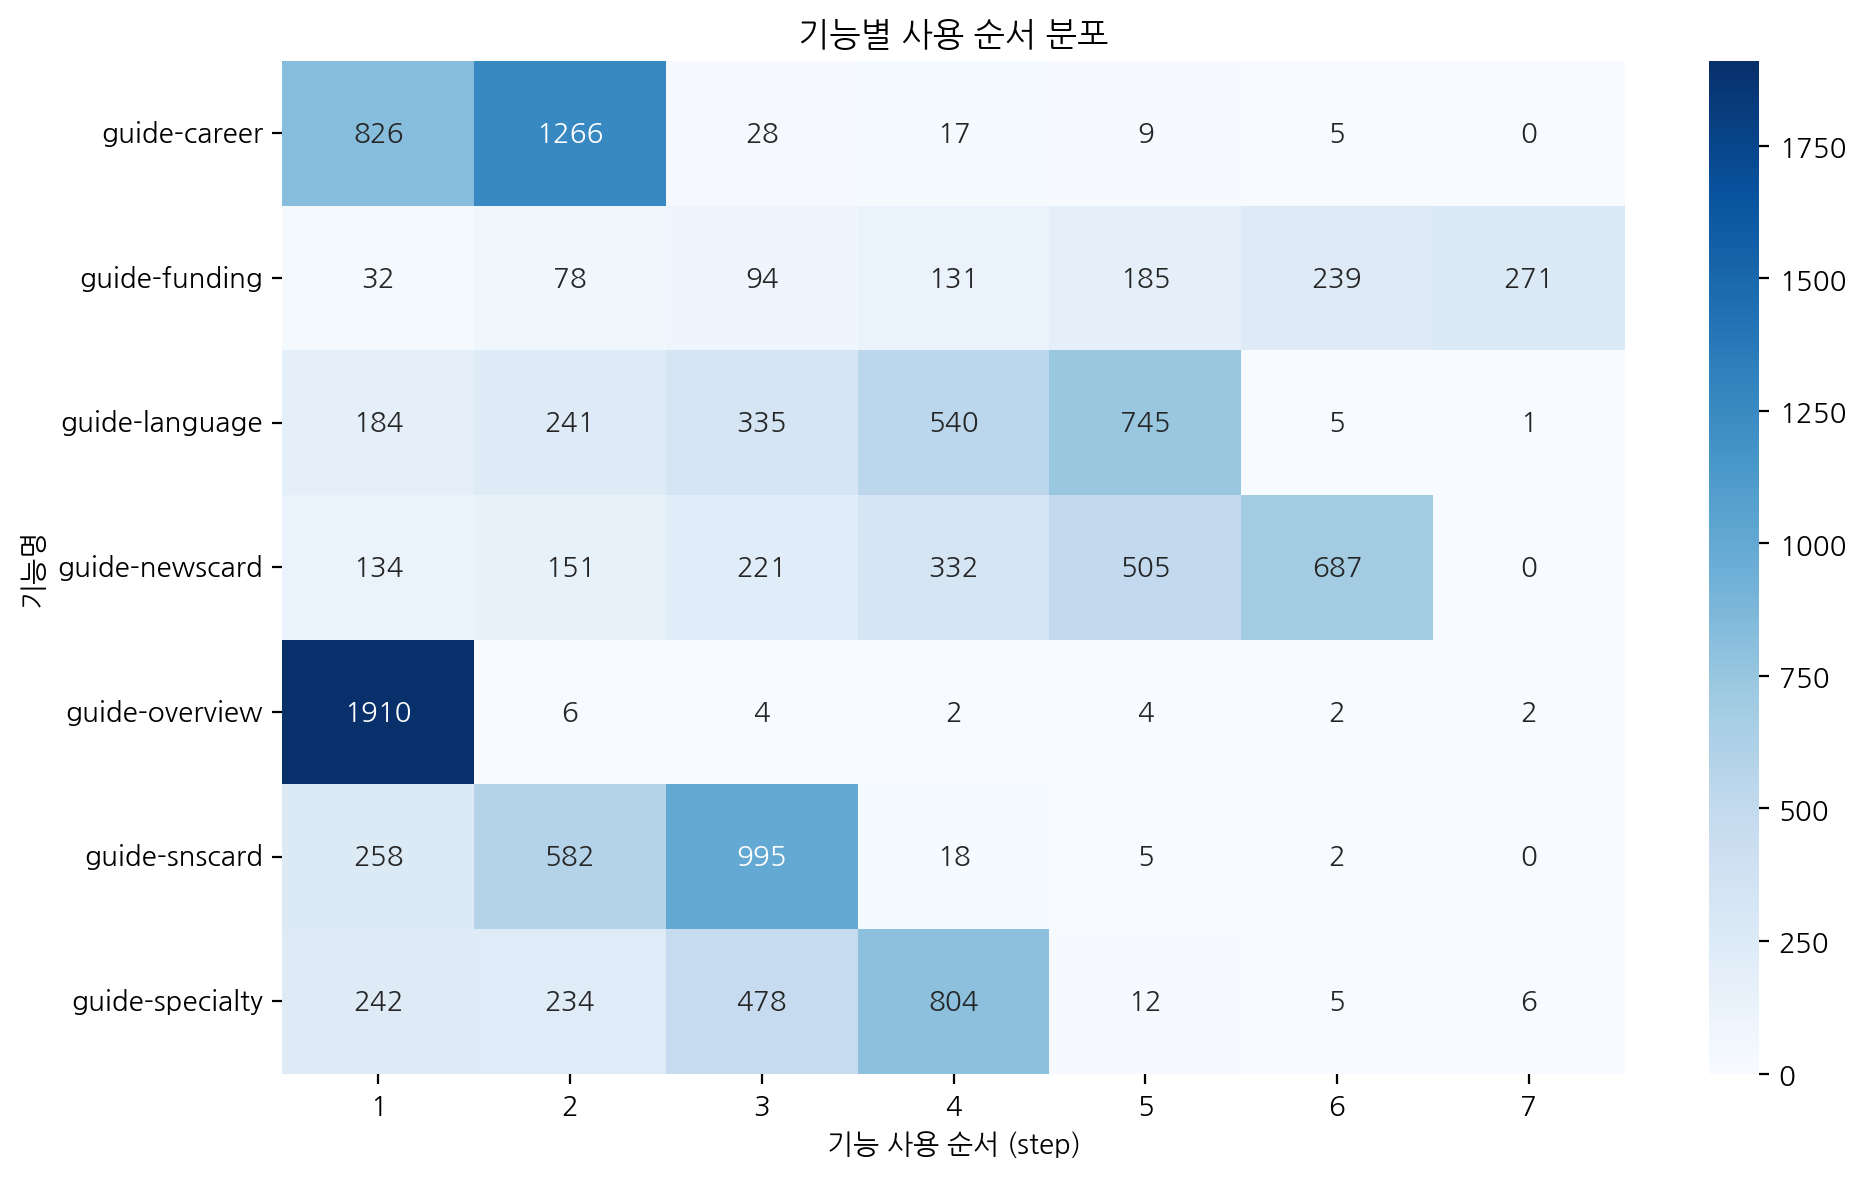

In [ ]:
# 순서별 기능 사용 빈도 테이블 만들기
step_distribution = df_exploded.groupby(['step', 'unique_action_path']).size().unstack(fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(step_distribution.T, annot=True, fmt='d', cmap='Blues')
plt.title('기능별 사용 순서 분포')
plt.xlabel('기능 사용 순서 (step)')
plt.ylabel('기능명')
plt.tight_layout()
plt.show()

In [ ]:
used_guide_log_trimmed

,user_uuid,action_prefix,step
5413559,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-specialty,1
5413620,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-language,2
5413366,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-newscard,3
5413574,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-funding,4
5413449,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-specialty,5
...,...,...,...
450408,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-funding,5
450433,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-career,6
450079,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-snscard,7
9596630,ffcbc399-9452-4feb-bf6c-51330b699252,guide-career,1


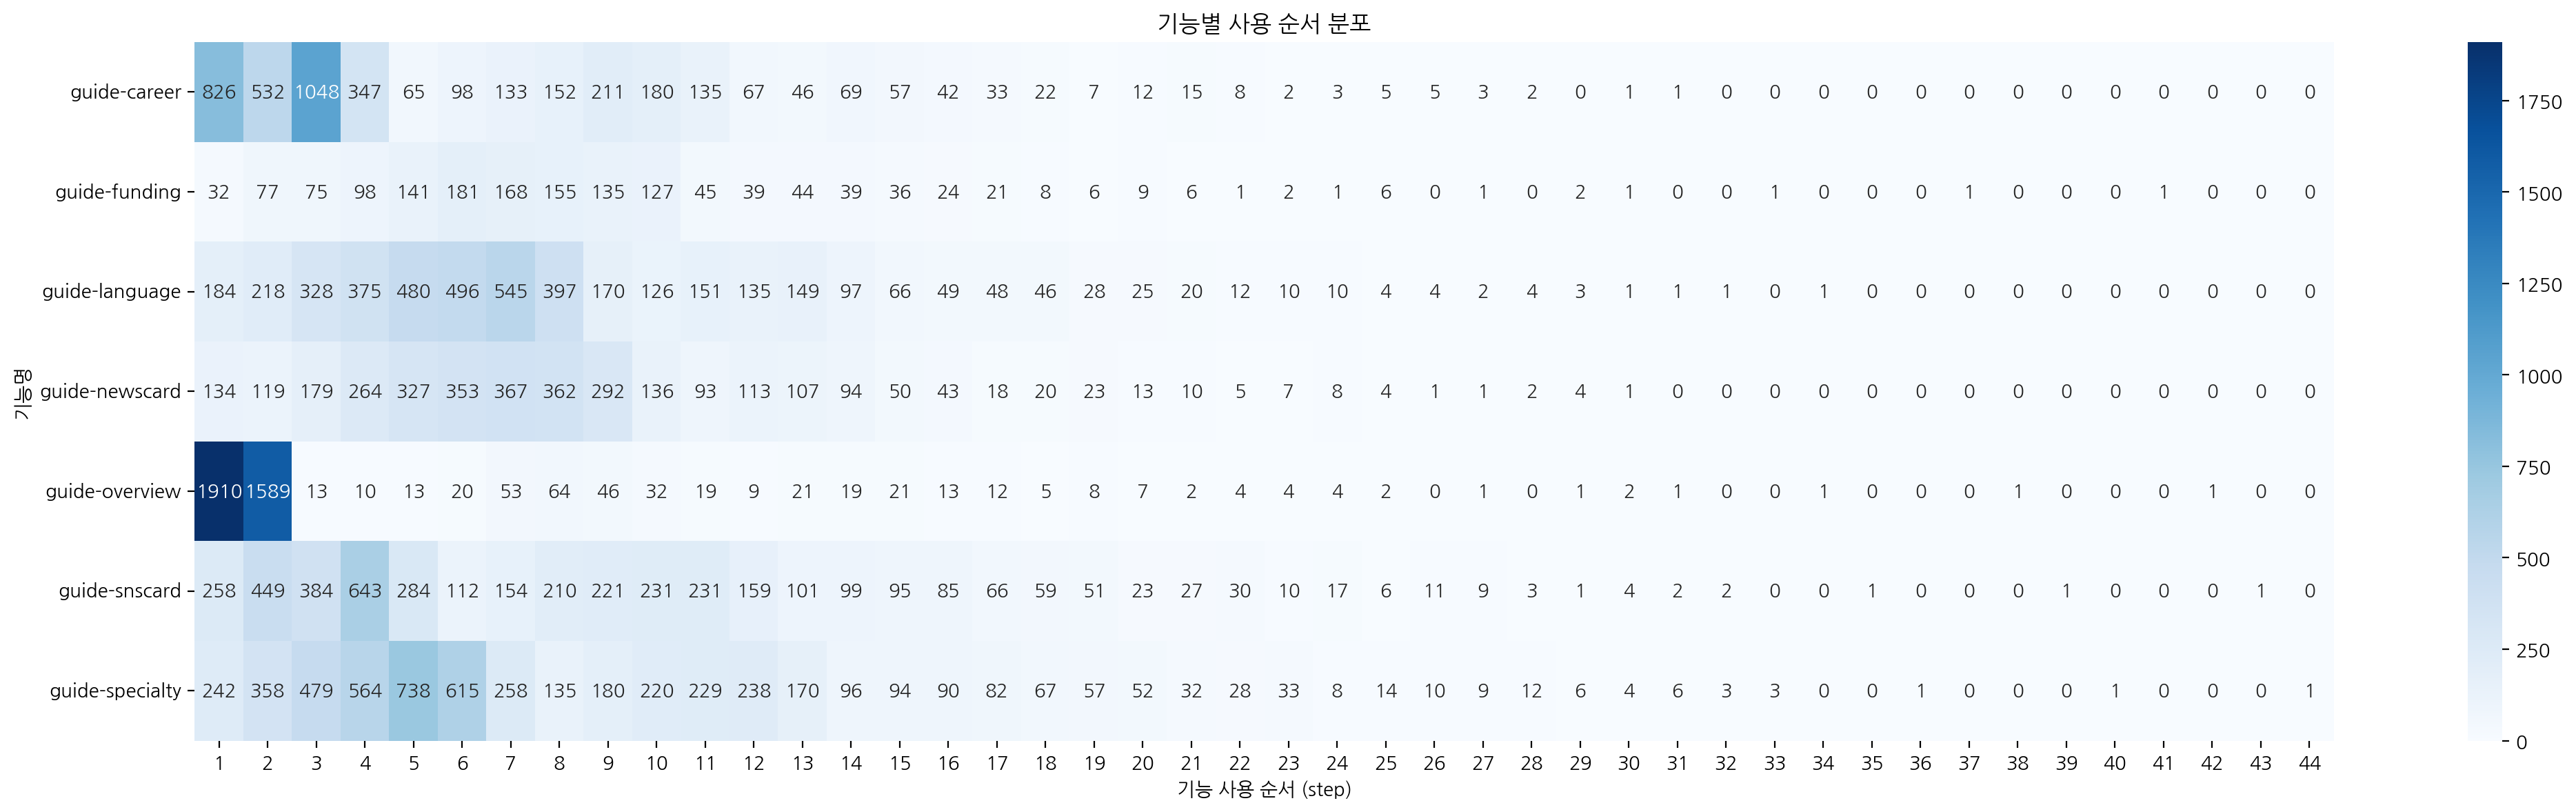

In [ ]:
# 순서별 기능 사용 빈도 테이블 만들기
step_distribution = used_guide_log_trimmed.groupby(['step', 'action_prefix']).size().unstack(fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(21, 6))
sns.heatmap(step_distribution.T, annot=True, fmt='d', cmap='Blues')
plt.title('기능별 사용 순서 분포')
plt.xlabel('기능 사용 순서 (step)')
plt.ylabel('기능명')
plt.tight_layout()
plt.show()

```
1. 초기 진입
    개요 > 경력 > 전문
(UX상 초기에 보여지는 기능일수록 유저가 많이 진입함)

2. 개요, SNS, 경력 → 우선배치

3. 미디어, 언어, 전문, 펀딩 → 후순위 배치
```

In [ ]:
used_guide_log_trimmed

,user_uuid,action_prefix,step
5413559,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-specialty,1
5413620,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-language,2
5413366,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-newscard,3
5413574,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-funding,4
5413449,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-specialty,5
...,...,...,...
450408,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-funding,5
450433,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-career,6
450079,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-snscard,7
9596630,ffcbc399-9452-4feb-bf6c-51330b699252,guide-career,1


In [ ]:
# 노출 → 기능사용 유저의 로그
used_guide_log_trimmed

# 지원완료 유저, 아닌 유저 구분
apply_done_user = log_trimmed[log_trimmed['action_type'] == 'apply-done']['user_uuid'].unique()
non_apply_user = log_trimmed[~log_trimmed['user_uuid'].isin(apply_done_user)]['user_uuid'].unique()

In [ ]:
# 유저별 마지막 step의 행 인덱스 구하기
last_step_idx = used_guide_log_trimmed.groupby('user_uuid')['step'].idxmax()

# 해당 인덱스로 원본 데이터에서 추출
last_steps = used_guide_log_trimmed.loc[last_step_idx].reset_index(drop=True)


In [ ]:
# 이탈 유저의 마지막 기능 살펴보기
last_steps = last_steps[last_steps['user_uuid'].isin(non_apply_user)]

In [ ]:
last_steps

,user_uuid,action_prefix,step
0,000e8610-16d3-4e9e-bf50-202d191ffac4,guide-funding,8
1,003a83bd-6cb7-4f99-ab3a-66904df762e2,guide-career,4
2,008314c3-4837-40fc-be5a-b38d1072db30,guide-career,4
3,008a1f6f-0d47-4007-b8a3-41927e930a9d,guide-snscard,2
4,00b43208-7cc2-4a35-b8fb-73baa3258dcf,guide-snscard,3
...,...,...,...
3584,ff7b8c3f-9f3f-4768-a85f-aa997bac4816,guide-specialty,12
3585,ffa28b75-c592-41ce-abc1-b2d500785939,guide-specialty,12
3586,ffba7f3a-64f6-424d-9e31-3d82242162b1,guide-language,8
3587,ffbcbc12-a9f9-4605-83b4-b5d8af393533,guide-snscard,7


In [ ]:
last_steps_df = last_steps.groupby('action_prefix')['user_uuid'].count().reset_index()
last_steps_df.sort_values('user_uuid', ascending=False, inplace=True)

In [ ]:
# 분모
last_steps_deno = used_guide_log_trimmed.groupby('action_prefix')['user_uuid'].count().reset_index(name='deno')

In [ ]:
# 분자
last_steps_df

# 분자 분모 merge
last_steps_merge = pd.merge(last_steps_df, last_steps_deno, how='inner', on='action_prefix')
last_steps_merge

,action_prefix,user_uuid,deno
0,guide-career,691,4127
1,guide-language,626,4186
2,guide-overview,570,3908
3,guide-specialty,547,5135
4,guide-snscard,517,4040
5,guide-newscard,405,3150
6,guide-funding,215,1483


In [ ]:
last_steps_merge['pct'] = round(last_steps_merge['user_uuid']/ last_steps_merge['deno'] * 100, 2)
last_steps_merge.sort_values('pct', ascending=False, inplace=True)

In [ ]:
last_steps_merge

,action_prefix,user_uuid,deno,pct
0,guide-career,691,4127,16.74
1,guide-language,626,4186,14.95
2,guide-overview,570,3908,14.59
6,guide-funding,215,1483,14.50
5,guide-newscard,405,3150,12.86
4,guide-snscard,517,4040,12.80
3,guide-specialty,547,5135,10.65


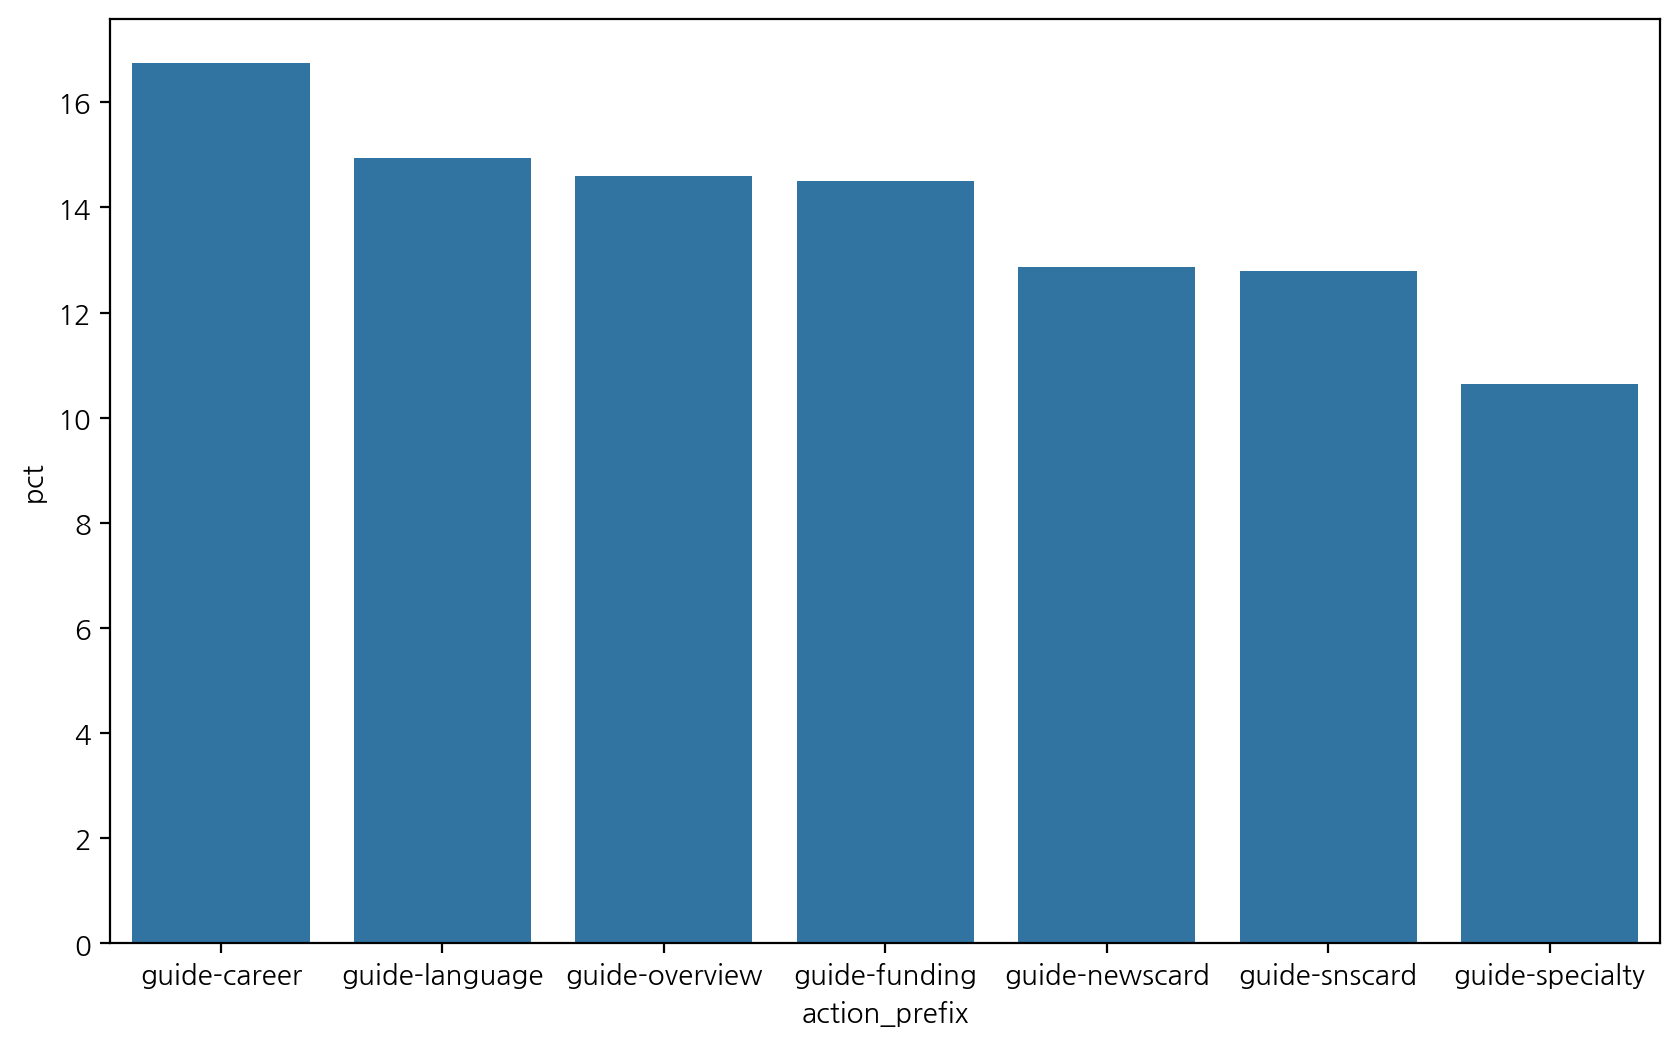

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=last_steps_merge, x='action_prefix', y='pct')
plt.show()

### 장바구니 분석

```
장바구니 분석을 통해
기능을 분류해보자
```

In [ ]:
!pip install mlxtend

In [ ]:
basket_df = used_guide_log_trimmed.groupby('user_uuid')['action_prefix'].apply(list).reset_index(name='paths')

In [ ]:
# TransctionEncoder를 통해 Encoding 해줌
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_result = te.fit_transform(basket_df['paths'])


In [ ]:
# DataFrame에 담아 확인
te_df = pd.DataFrame(te_result, columns=te.columns_)
te_df.head()

,guide-career,guide-funding,guide-language,guide-newscard,guide-overview,guide-snscard,guide-specialty
0,False,True,True,True,False,False,True
1,True,False,False,False,True,False,False
2,True,False,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,True,True,False


In [ ]:
# 장바구니 분석 모델 사용
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(te_df, min_support=0.4, use_colnames=True)  # 최소 지지도 0.4
frequent_itemsets

,support,itemsets
0,0.599833,(guide-career)
1,0.571946,(guide-language)
2,0.566090,(guide-newscard)
3,0.538204,(guide-overview)
4,0.518684,(guide-snscard)
5,0.496654,(guide-specialty)
6,0.414110,"(guide-career, guide-language)"
7,0.418293,"(guide-career, guide-newscard)"
8,0.406860,"(guide-snscard, guide-career)"
9,0.485220,"(guide-language, guide-newscard)"


In [ ]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)  # 최소 신뢰도 0.6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(guide-language),(guide-newscard),0.571946,0.566090,0.485220,0.848367,1.498642,1.0,0.161447,2.861571,0.777307,0.743272,0.650542,0.852755
1,(guide-newscard),(guide-language),0.566090,0.571946,0.485220,0.857143,1.498642,1.0,0.161447,2.996375,0.766817,0.743272,0.666263,0.852755
2,(guide-snscard),(guide-language),0.518684,0.571946,0.423034,0.815591,1.425993,1.0,0.126375,2.321223,0.620661,0.633668,0.569193,0.777615
3,(guide-specialty),(guide-language),0.496654,0.571946,0.402398,0.810219,1.416599,1.0,0.118339,2.255513,0.584258,0.604018,0.556642,0.756889
4,(guide-snscard),(guide-newscard),0.518684,0.566090,0.424707,0.818817,1.446443,1.0,0.131085,2.394872,0.641260,0.643431,0.582441,0.784532


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
6,(guide-language),(guide-newscard),0.571946,0.566090,0.485220,0.848367,1.498642,1.0,0.161447,2.861571,0.777307,0.743272,0.650542,0.852755
7,(guide-newscard),(guide-language),0.566090,0.571946,0.485220,0.857143,1.498642,1.0,0.161447,2.996375,0.766817,0.743272,0.666263,0.852755
12,(guide-snscard),(guide-newscard),0.518684,0.566090,0.424707,0.818817,1.446443,1.0,0.131085,2.394872,0.641260,0.643431,0.582441,0.784532
13,(guide-newscard),(guide-snscard),0.566090,0.518684,0.424707,0.750246,1.446443,1.0,0.131085,1.927164,0.711320,0.643431,0.481103,0.784532
8,(guide-snscard),(guide-language),0.518684,0.571946,0.423034,0.815591,1.425993,1.0,0.126375,2.321223,0.620661,0.633668,0.569193,0.777615
9,(guide-language),(guide-snscard),0.571946,0.518684,0.423034,0.739639,1.425993,1.0,0.126375,1.848651,0.697889,0.633668,0.459065,0.777615
10,(guide-specialty),(guide-language),0.496654,0.571946,0.402398,0.810219,1.416599,1.0,0.118339,2.255513,0.584258,0.604018,0.556642,0.756889
11,(guide-language),(guide-specialty),0.571946,0.496654,0.402398,0.703559,1.416599,1.0,0.118339,1.697966,0.687026,0.604018,0.411060,0.756889
4,(guide-snscard),(guide-career),0.518684,0.599833,0.406860,0.784409,1.307712,1.0,0.095737,1.856138,0.488880,0.571708,0.461247,0.731349
5,(guide-career),(guide-snscard),0.599833,0.518684,0.406860,0.678289,1.307712,1.0,0.095737,1.496114,0.588019,0.571708,0.331602,0.731349


In [ ]:
!pip install networkx

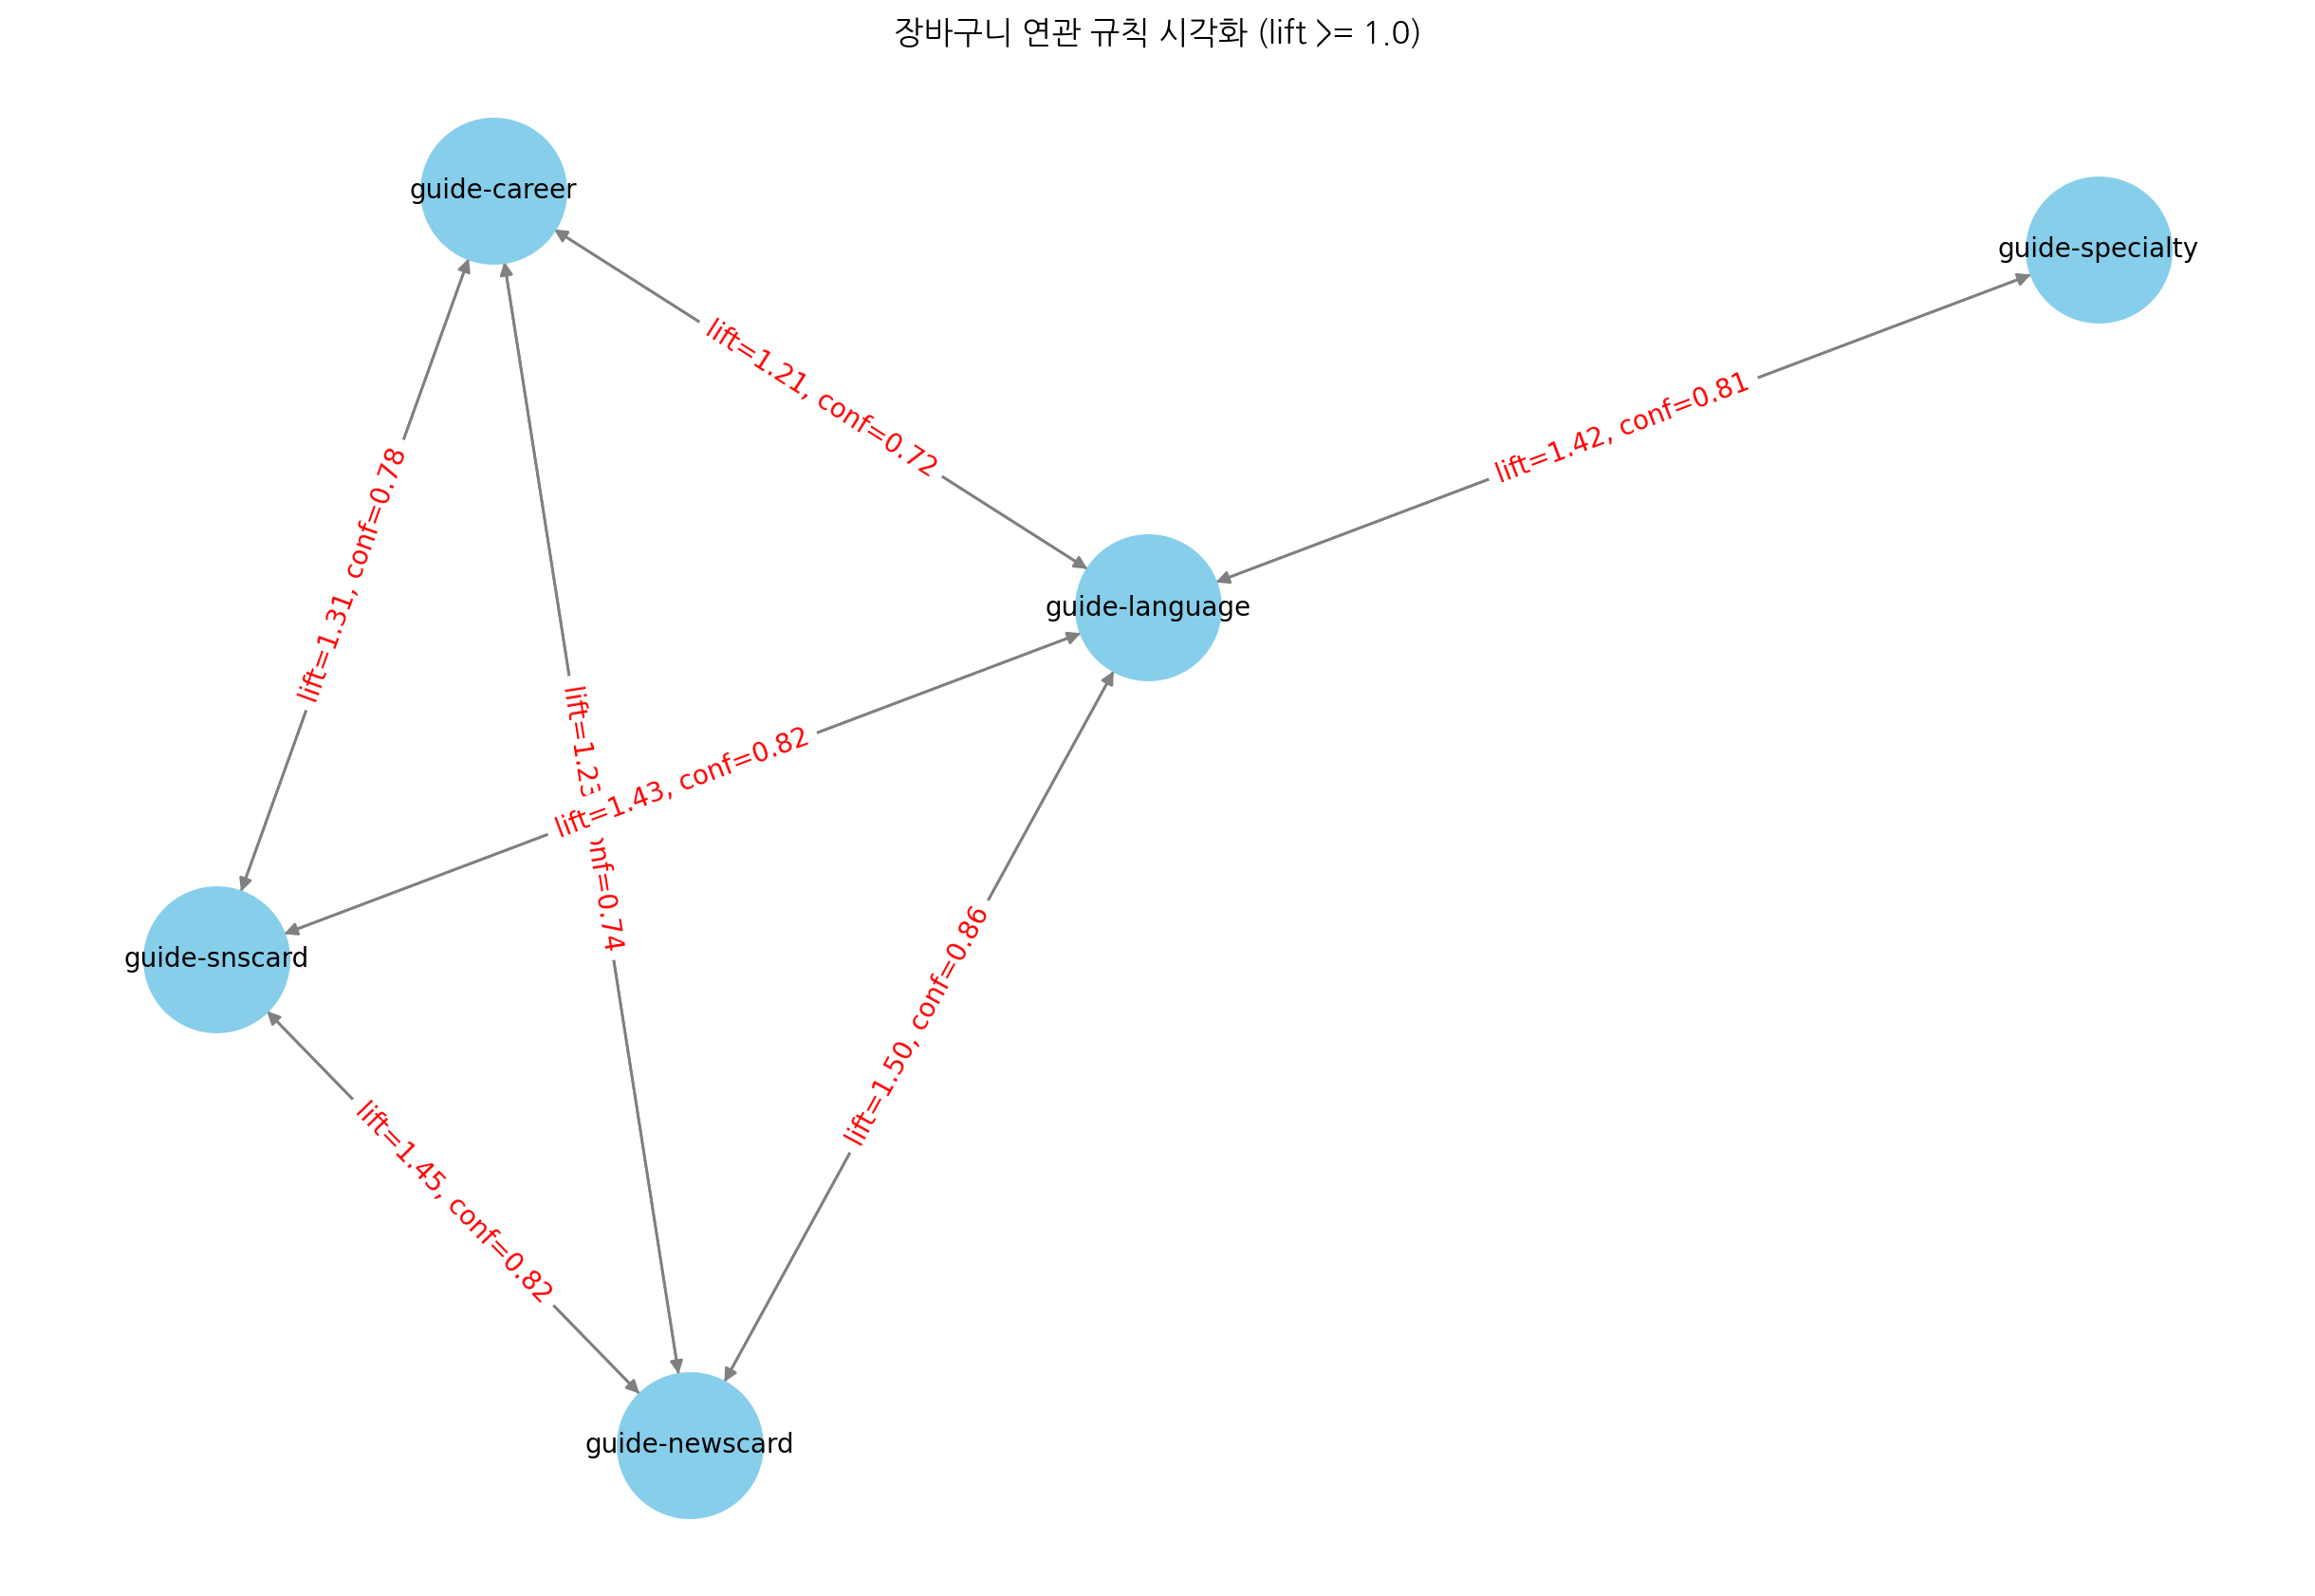

In [ ]:
import networkx as nx  
import matplotlib.font_manager as fm

# 그래프 생성
G = nx.DiGraph()

# lift > 1인 경우만 그래프에 추가
for _, row in rules.iterrows():
    if row['lift'] >= 1.0:
        a = list(row['antecedents'])[0]
        c = list(row['consequents'])[0]
        G.add_edge(a, c, label=f"lift={row['lift']:.2f}, conf={row['confidence']:.2f}")

# 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, edge_color="gray", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("장바구니 연관 규칙 시각화 (lift >= 1.0)")
plt.axis("off")
plt.show()



```
snscard
specialty
language
career
newscard
overview
funding
``` 